# Business Understanding Section

"""
## Business Problem: Wine Quality Classification

**Stakeholder:** Quality Assurance Manager, Vintage Vineyards Winery

**Business Context:**
Our winery has been experiencing inconsistent quality across wine batches, leading to:
- Price reductions for lower-quality wines
- Customer dissatisfaction and returns
- Inefficient allocation to premium vs. standard distribution channels

**Business Objective:**
Develop a predictive model that can classify wine batches as "Premium Quality" (quality ≥ 7) 
or "Standard Quality" (quality < 7) based on measurable chemical properties.

**Business Value:**
- Route premium wines to high-margin channels ($25+ bottles)
- Identify underperforming batches early for blending or correction
- Optimize production parameters to increase premium yield
- Estimated potential revenue increase: 15-20% through better quality control
"""

## Methodology
The dataset that we will use today will be the Wine Quality dataset from Kaggle which will form the basis of our predictive model.Our key areas of focus will be three areas:

- Data Cleaning & Exploratory Data Analysis (EDA)
- Perform EDA with the Target in Mind
- Baseline Modeling & Preprocessing
- Iterative Modeling & Hyperparameter Tuning
- Final Evaluation & Reporting

Great! Lets get straight into it.

### 1. Data Cleaning & EDA
We will first load our dataset from the folder which is known as **WineQT.CSV** and perform some data cleaning and extensive Exploratory Data Analysis so as to get the very best version of our data to use to create our predictive model.

Lets go ahead and load our dataset and print the first five rows of the data. We can also get some info and the shape of our dataset.

In [1]:
import pandas as pd
Wine_Data = pd.read_csv('WineQt.csv')
Wine_Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2]:
Wine_Data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [3]:
Wine_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Great! We have been lucky to find numerical data for our use therefore there will be no need to encode categorical data. Let's now proceed to clean our data and do some Exploratory Data Analysis.

In [4]:
# Basic data info
print("Dataset shape:", Wine_Data.shape)
print("\nData types:")
print(Wine_Data.dtypes)
print("\nMissing values:")
print(Wine_Data.isnull().sum())

# Check for duplicates
print(f"Duplicate rows: {Wine_Data.duplicated().sum()}")

# Basic statistics
print(Wine_Data.describe())

Dataset shape: (1143, 13)

Data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Duplicate rows: 0
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mea

We can verify that our data is sufficiently clean therefore no additional data cleaning is needed for this dataset. We can go right ahead and perform some Exploratory Data Analysis on our data.


=== STEP 2: TARGET VARIABLE ANALYSIS ===
Quality score distribution:
Quality 3: 6 wines (0.5%)
Quality 4: 33 wines (2.9%)
Quality 5: 483 wines (42.3%)
Quality 6: 462 wines (40.4%)
Quality 7: 143 wines (12.5%)
Quality 8: 16 wines (1.4%)

Quality range: 3 to 8


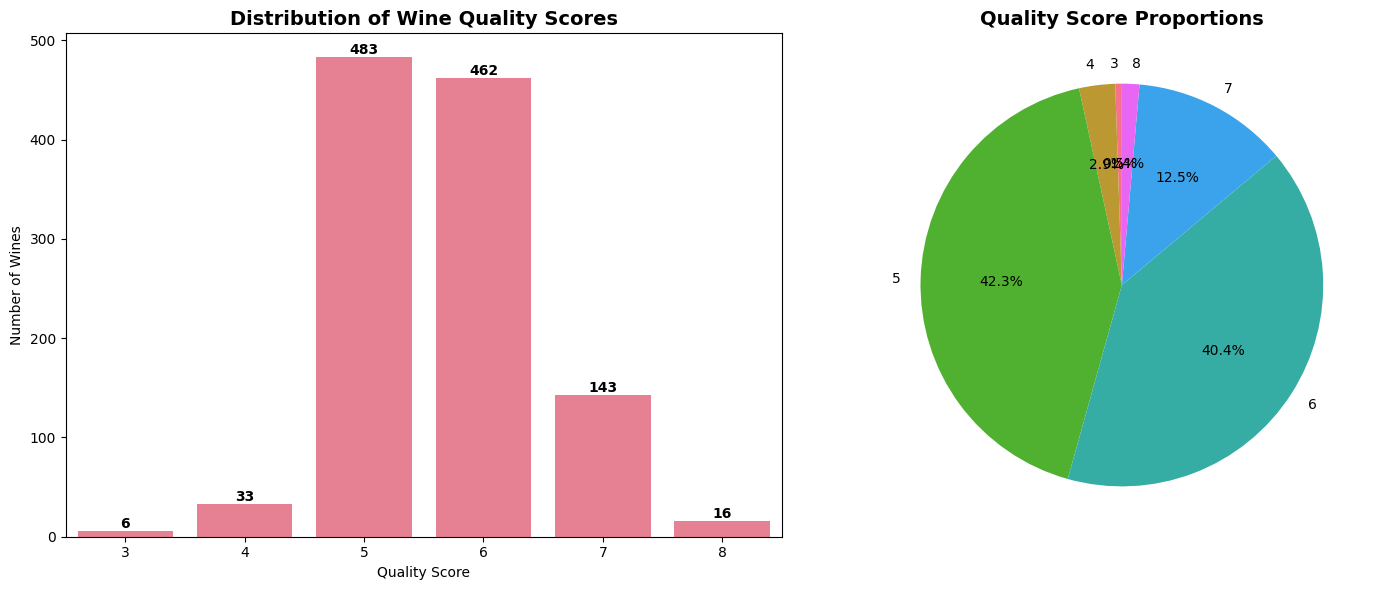

In [5]:
# Analyze the target variable distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 2. EXPLORE QUALITY DISTRIBUTION
print("\n" + "="*50)
print("=== STEP 2: TARGET VARIABLE ANALYSIS ===")

# Get quality distribution
quality_counts = Wine_Data['quality'].value_counts().sort_index()
print("Quality score distribution:")
for score, count in quality_counts.items():
    percentage = (count / len(Wine_Data)) * 100
    print(f"Quality {score}: {count} wines ({percentage:.1f}%)")

print(f"\nQuality range: {Wine_Data['quality'].min()} to {Wine_Data['quality'].max()}")

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Countplot
sns.countplot(data=Wine_Data, x='quality', ax=ax1, order=sorted(Wine_Data['quality'].unique()))
ax1.set_title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Number of Wines')

# Add value labels on bars
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontweight='bold')

# Plot 2: Pie chart (only if we have reasonable number of categories)
if len(quality_counts) <= 10:  # Only make pie chart if not too many categories
    ax2.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette("husl", len(quality_counts)))
    ax2.set_title('Quality Score Proportions', fontsize=14, fontweight='bold')
else:
    # If too many quality categories, show a boxplot instead
    sns.boxplot(data=Wine_Data, y='quality', ax=ax2)
    ax2.set_title('Quality Score Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

The visualizations above show that the qulaity of the wines in our dataset range from 3 to 8. We can now do some quality threshold analysis to determine the range of quality of wine which is deemed acceptable worldwide. 

In [6]:
# 3. THRESHOLD ANALYSIS
print("\n" + "="*50)
print("=== STEP 3: THRESHOLD ANALYSIS ===")

# Analyze different threshold options
def analyze_thresholds(data):
    print("Threshold Analysis for Binary Classification:")
    print("-" * 50)
    
    thresholds = [5, 6, 7]  # Common thresholds for wine quality
    
    for threshold in thresholds:
        positive_count = (data['quality'] >= threshold).sum()
        positive_pct = (positive_count / len(data)) * 100
        negative_pct = 100 - positive_pct
        
        print(f"Threshold {threshold}+:")
        print(f"  • High Quality (≥{threshold}): {positive_count} wines ({positive_pct:.1f}%)")
        print(f"  • Standard Quality (<{threshold}): {len(data) - positive_count} wines ({negative_pct:.1f}%)")
        
        if 25 <= positive_pct <= 75:
            print(f"  ✓ Good class balance")
        elif positive_pct < 25:
            print(f"  ⚠ Warning: Potential class imbalance (minority class < 25%)")
        else:
            print(f"  ⚠ Warning: Potential class imbalance (minority class > 75%)")
        print()

analyze_thresholds(Wine_Data)


=== STEP 3: THRESHOLD ANALYSIS ===
Threshold Analysis for Binary Classification:
--------------------------------------------------
Threshold 5+:
  • High Quality (≥5): 1104 wines (96.6%)
  • Standard Quality (<5): 39 wines (3.4%)
  ⚠ Warning: Potential class imbalance (minority class > 75%)

Threshold 6+:
  • High Quality (≥6): 621 wines (54.3%)
  • Standard Quality (<6): 522 wines (45.7%)
  ✓ Good class balance

Threshold 7+:
  • High Quality (≥7): 159 wines (13.9%)
  • Standard Quality (<7): 984 wines (86.1%)
  ⚠ Warning: Potential class imbalance (minority class < 25%)



Now that we have done our threshold analysis and determine the percentages of each level, we can clearly note that class imbalances will exist which will create bias later in our model. Therefore, during fitting of our model, we will try to balance our data to prevent overfitting on one class.

We can now proceed to check on to check on some feature correlation. This is where we will see the features in our dataset and determine which are the best to use to predict our target variable.

In [7]:
# 4. FEATURE CORRELATION PREVIEW (Quick check before creating target)
print("\n" + "="*50)
print("=== STEP 4: FEATURE CORRELATION PREVIEW ===")

# Calculate correlation with quality (numeric)
correlation_with_quality = Wine_Data.corr(numeric_only=True)['quality'].sort_values(ascending=False)
print("Correlation with Quality Score:")
for feature, corr in correlation_with_quality.items():
    if feature != 'quality' and feature != 'Id':  # Exclude target and ID
        print(f"  {feature:20}: {corr:+.3f}")



=== STEP 4: FEATURE CORRELATION PREVIEW ===
Correlation with Quality Score:
  alcohol             : +0.485
  sulphates           : +0.258
  citric acid         : +0.241
  fixed acidity       : +0.122
  residual sugar      : +0.022
  pH                  : -0.052
  free sulfur dioxide : -0.063
  chlorides           : -0.124
  density             : -0.175
  total sulfur dioxide: -0.183
  volatile acidity    : -0.407


The correlation seems balanced  although the correlation scores seem low, which mean no one feature has a massive impact on the quality of the wine. We can now make a final threshold decision. We will set a threshold quality of 7 to mark that for any wine to be considered good wine, it must meet a rating of 7.

In [8]:
# 5. FINAL THRESHOLD DECISION
print("\n" + "="*50)
print("=== STEP 5: FINAL THRESHOLD DECISION ===")

# Based on the analysis, choose the best threshold
# Common choice for wine: 7+ = High Quality, but adjust based on your distribution
final_threshold = 7  # You can change this based on your analysis

print(f"Selected threshold: {final_threshold}+ = High Quality")
print(f"Rationale: This creates a meaningful business distinction between premium and standard wines")

# Create the binary target
Wine_Data['is_high_quality'] = (Wine_Data['quality'] >= final_threshold).astype(int)
Wine_Data['quality_category'] = Wine_Data['quality'].apply(
    lambda x: 'High Quality' if x >= final_threshold else 'Standard Quality'
)

final_balance = Wine_Data['is_high_quality'].value_counts(normalize=True)
print(f"\nFinal class distribution:")
print(f"• Standard Quality (0): {final_balance[0]:.1%}")
print(f"• High Quality (1): {final_balance[1]:.1%}")

print(f"\nDataset ready for further EDA and modeling!")
print(f"New columns added: 'is_high_quality' (binary) and 'quality_category' (string)")


=== STEP 5: FINAL THRESHOLD DECISION ===
Selected threshold: 7+ = High Quality
Rationale: This creates a meaningful business distinction between premium and standard wines

Final class distribution:
• Standard Quality (0): 86.1%
• High Quality (1): 13.9%

Dataset ready for further EDA and modeling!
New columns added: 'is_high_quality' (binary) and 'quality_category' (string)


Now let's preview our data once more.

In [9]:
Wine_Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_high_quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,Standard Quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0,Standard Quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0,Standard Quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0,Standard Quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0,Standard Quality


Now let's proceed with the comprehensive EDA to understand the relationships between features and wine quality.

#### 1. Class Distribution Confirmation

In [10]:
from scipy import stats

# Set up the visualization style
plt.style.use('default')
sns.set_palette("husl")

print("=== COMPREHENSIVE EDA: FEATURES vs WINE QUALITY ===")

# 1. CLASS DISTRIBUTION CONFIRMATION
print("\n1. FINAL CLASS DISTRIBUTION")
class_dist = Wine_Data['is_high_quality'].value_counts()
print(f"Standard Quality (0): {class_dist[0]} wines ({(class_dist[0]/len(Wine_Data))*100:.1f}%)")
print(f"High Quality (1): {class_dist[1]} wines ({(class_dist[1]/len(Wine_Data))*100:.1f}%)")

=== COMPREHENSIVE EDA: FEATURES vs WINE QUALITY ===

1. FINAL CLASS DISTRIBUTION
Standard Quality (0): 984 wines (86.1%)
High Quality (1): 159 wines (13.9%)


#### Correlation Analysis


2. CORRELATION ANALYSIS


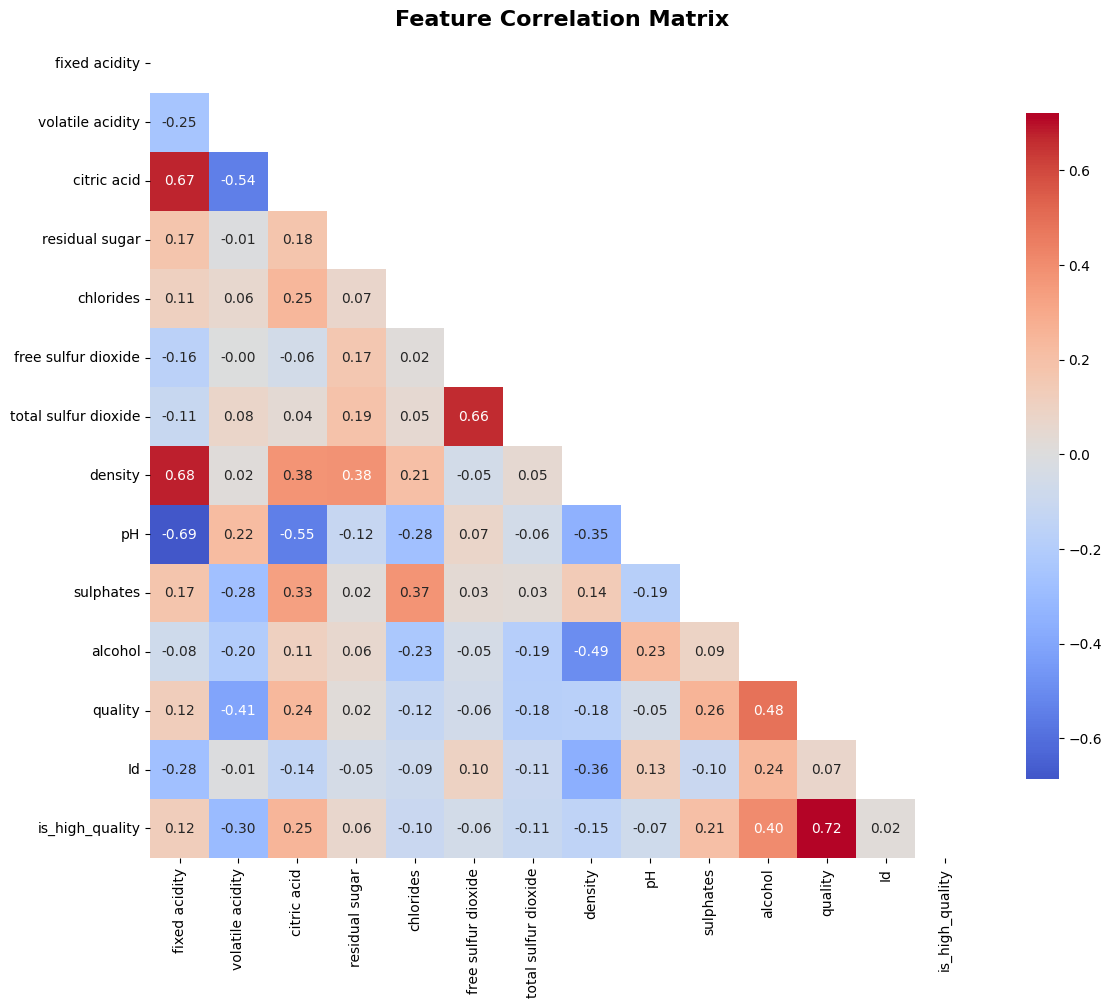


Correlation with High Quality (is_high_quality):
  alcohol                  : +0.404
  citric acid              : +0.251
  sulphates                : +0.208
  fixed acidity            : +0.123
  residual sugar           : +0.064
  free sulfur dioxide      : -0.056
  pH                       : -0.073
  chlorides                : -0.104
  total sulfur dioxide     : -0.113
  density                  : -0.149
  volatile acidity         : -0.305


In [11]:
# 2. CORRELATION ANALYSIS
print("\n2. CORRELATION ANALYSIS")
# Calculate correlation matrix
corr_matrix = Wine_Data.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Focus on correlation with our target
print("\nCorrelation with High Quality (is_high_quality):")
target_corr = corr_matrix['is_high_quality'].sort_values(ascending=False)
for feature, corr_val in target_corr.items():
    if feature not in ['is_high_quality', 'Id', 'quality']:
        print(f"  {feature:25}: {corr_val:+.3f}")

#### 3.Univariate Analysis By Quality Class


3. UNIVARIATE ANALYSIS BY QUALITY CLASS


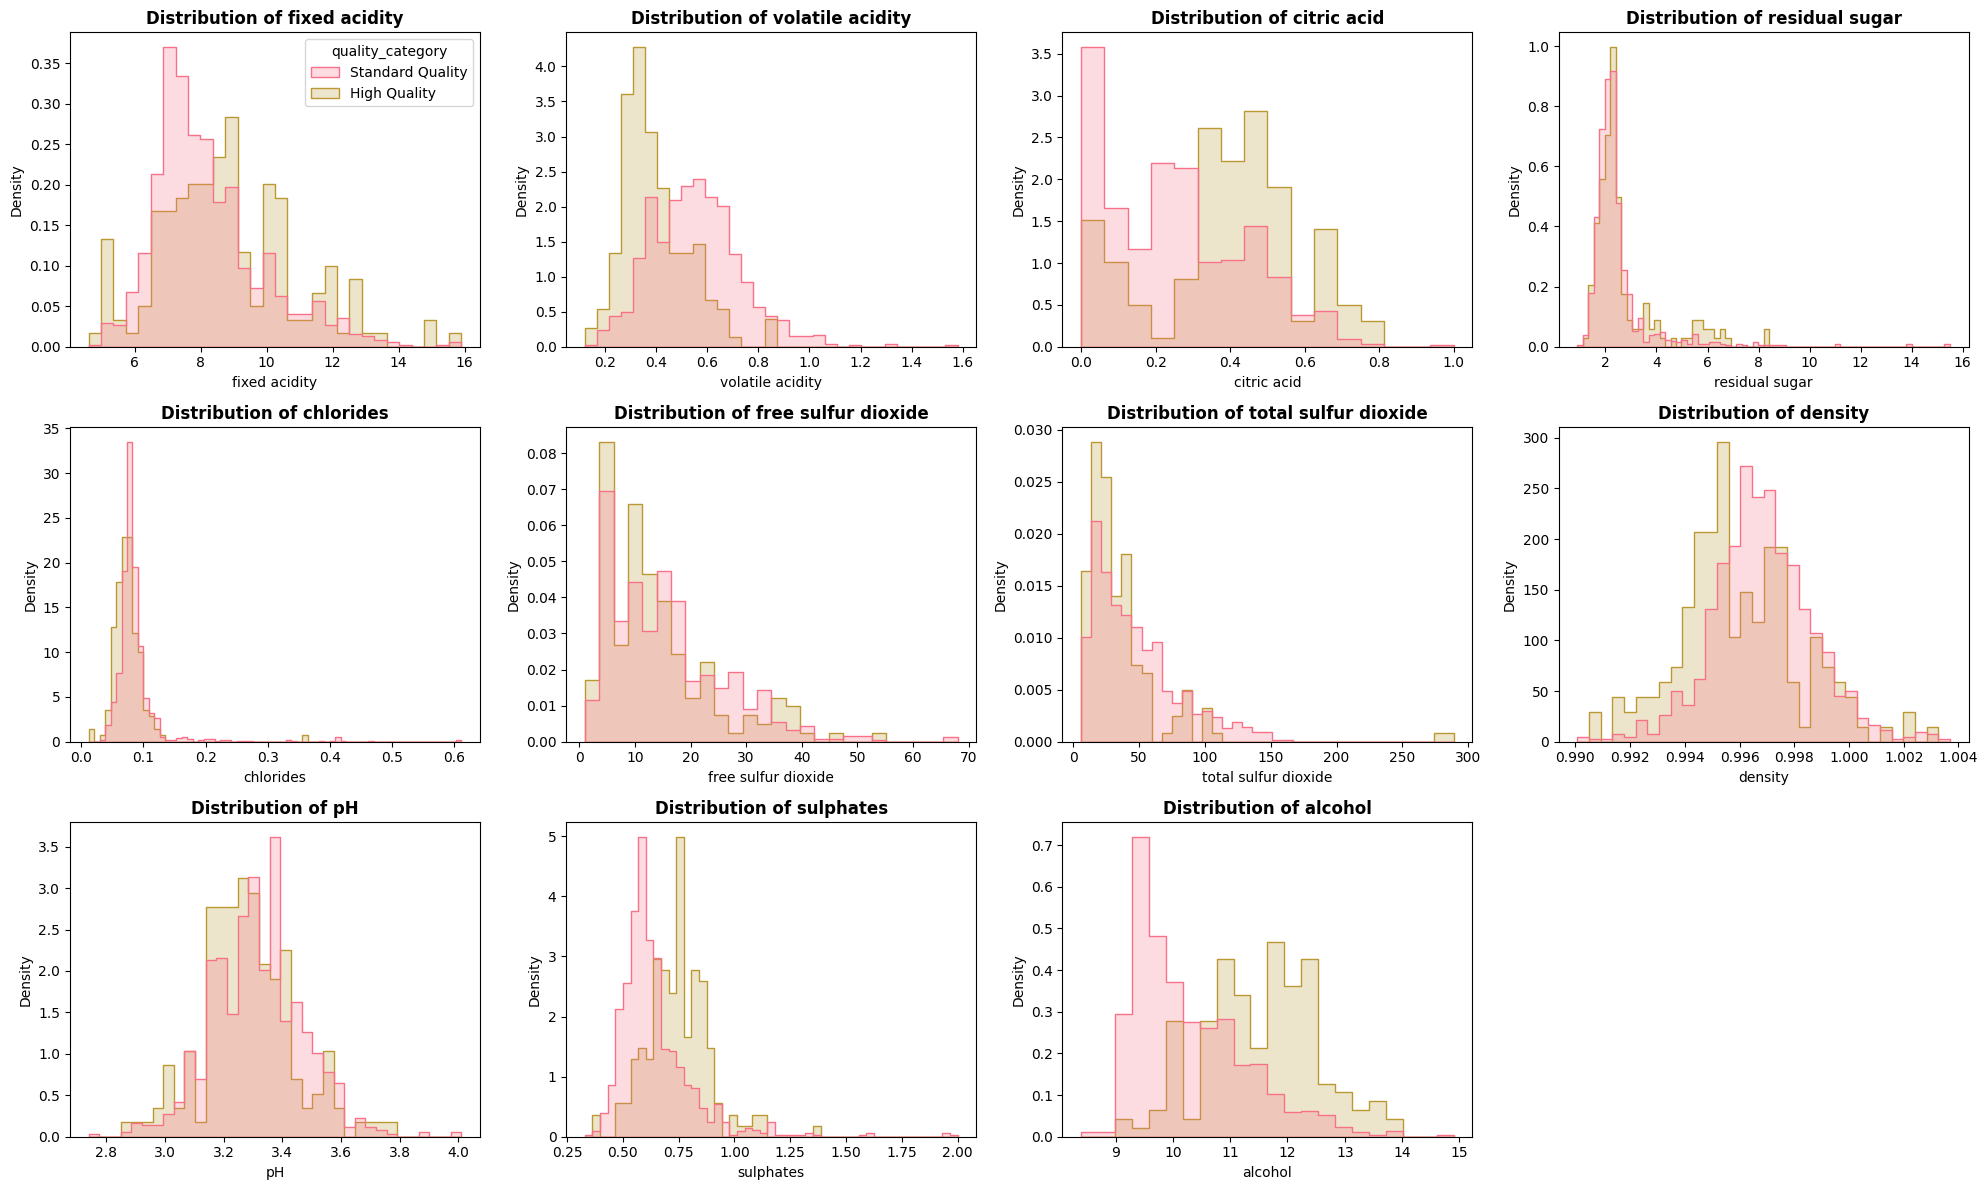

In [12]:
# 3. UNIVARIATE ANALYSIS BY QUALITY CLASS
print("\n3. UNIVARIATE ANALYSIS BY QUALITY CLASS")

# Select features for analysis (exclude ID and categorical columns)
feature_columns = [col for col in Wine_Data.columns if col not in 
                  ['Id', 'is_high_quality', 'quality_category', 'quality']]

# Create subplots for feature distributions
n_cols = 4
n_rows = (len(feature_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    # Create overlapping histograms
    sns.histplot(data=Wine_Data, x=feature, hue='quality_category', 
                 element='step', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    
    # Add legend only for first plot
    if i != 0:
        axes[i].get_legend().remove()

# Remove empty subplots
for j in range(len(feature_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 4. Bivariate Analysis


4. FEATURE DISTRIBUTIONS BY QUALITY CLASS (Boxplots)


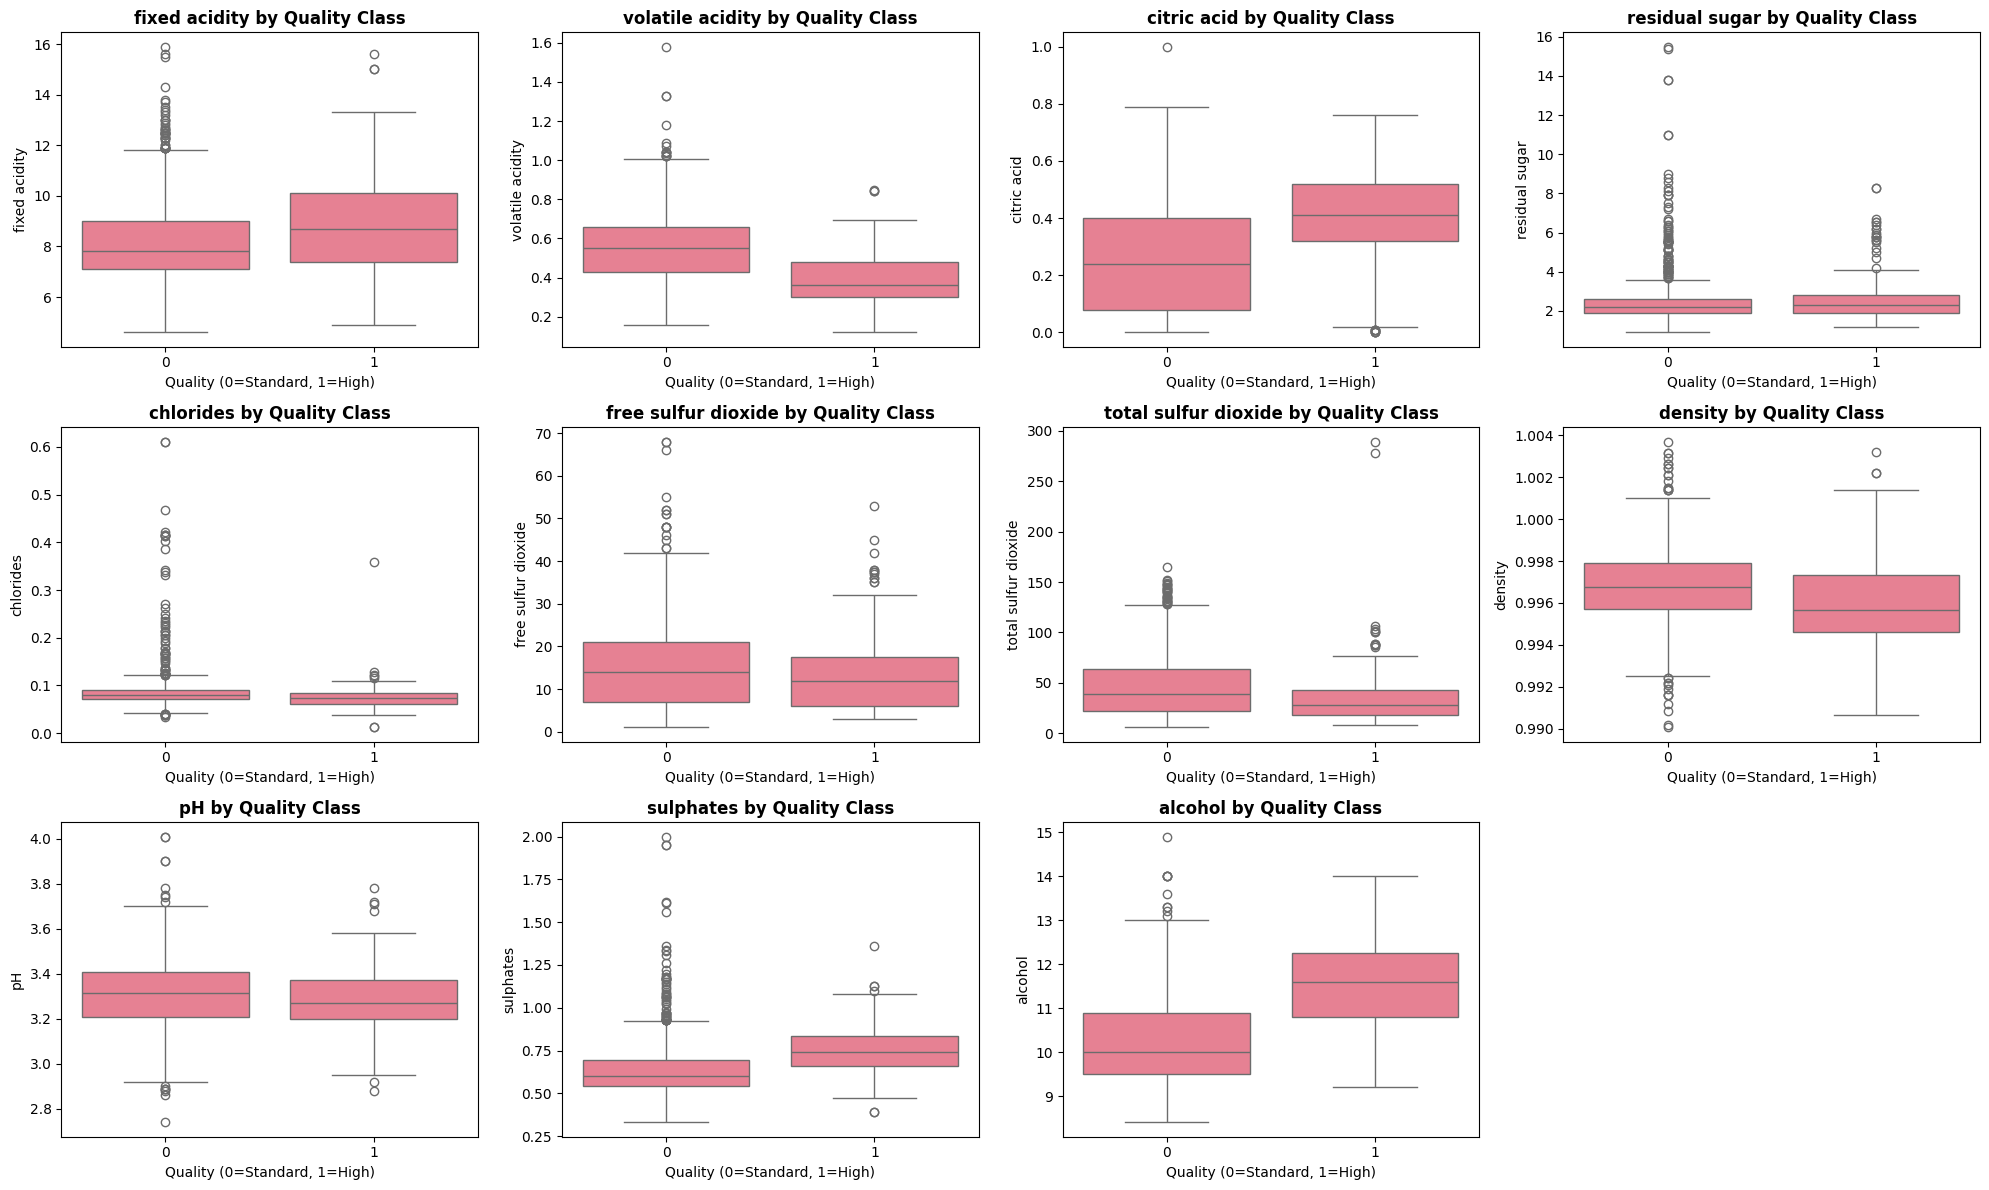

In [13]:
# 4. BIVARIATE ANALYSIS: BOXPLOTS
print("\n4. FEATURE DISTRIBUTIONS BY QUALITY CLASS (Boxplots)")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    sns.boxplot(data=Wine_Data, x='is_high_quality', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Quality Class', fontweight='bold')
    axes[i].set_xlabel('Quality (0=Standard, 1=High)')
    axes[i].set_ylabel(feature)

# Remove empty subplots
for j in range(len(feature_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 5. Statistical Significance

In [14]:
# 5. STATISTICAL SIGNIFICANCE TEST
print("\n5. STATISTICAL SIGNIFICANCE TEST (t-tests)")
print("Testing if feature means differ significantly between quality classes:")

for feature in feature_columns:
    standard_qual = Wine_Data[Wine_Data['is_high_quality'] == 0][feature]
    high_qual = Wine_Data[Wine_Data['is_high_quality'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(standard_qual, high_qual, equal_var=False)
    
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else " (not significant)"
    
    print(f"  {feature:25}: p-value = {p_value:.6f} {significance}")


5. STATISTICAL SIGNIFICANCE TEST (t-tests)
Testing if feature means differ significantly between quality classes:
  fixed acidity            : p-value = 0.000465 ***
  volatile acidity         : p-value = 0.000000 ***
  citric acid              : p-value = 0.000000 ***
  residual sugar           : p-value = 0.036097 *
  chlorides                : p-value = 0.000001 ***
  free sulfur dioxide      : p-value = 0.052804  (not significant)
  total sulfur dioxide     : p-value = 0.000440 ***
  density                  : p-value = 0.000023 ***
  pH                       : p-value = 0.013786 *
  sulphates                : p-value = 0.000000 ***
  alcohol                  : p-value = 0.000000 ***


#### 6. Key Features Analysis


6. KEY FEATURES DEEP DIVE


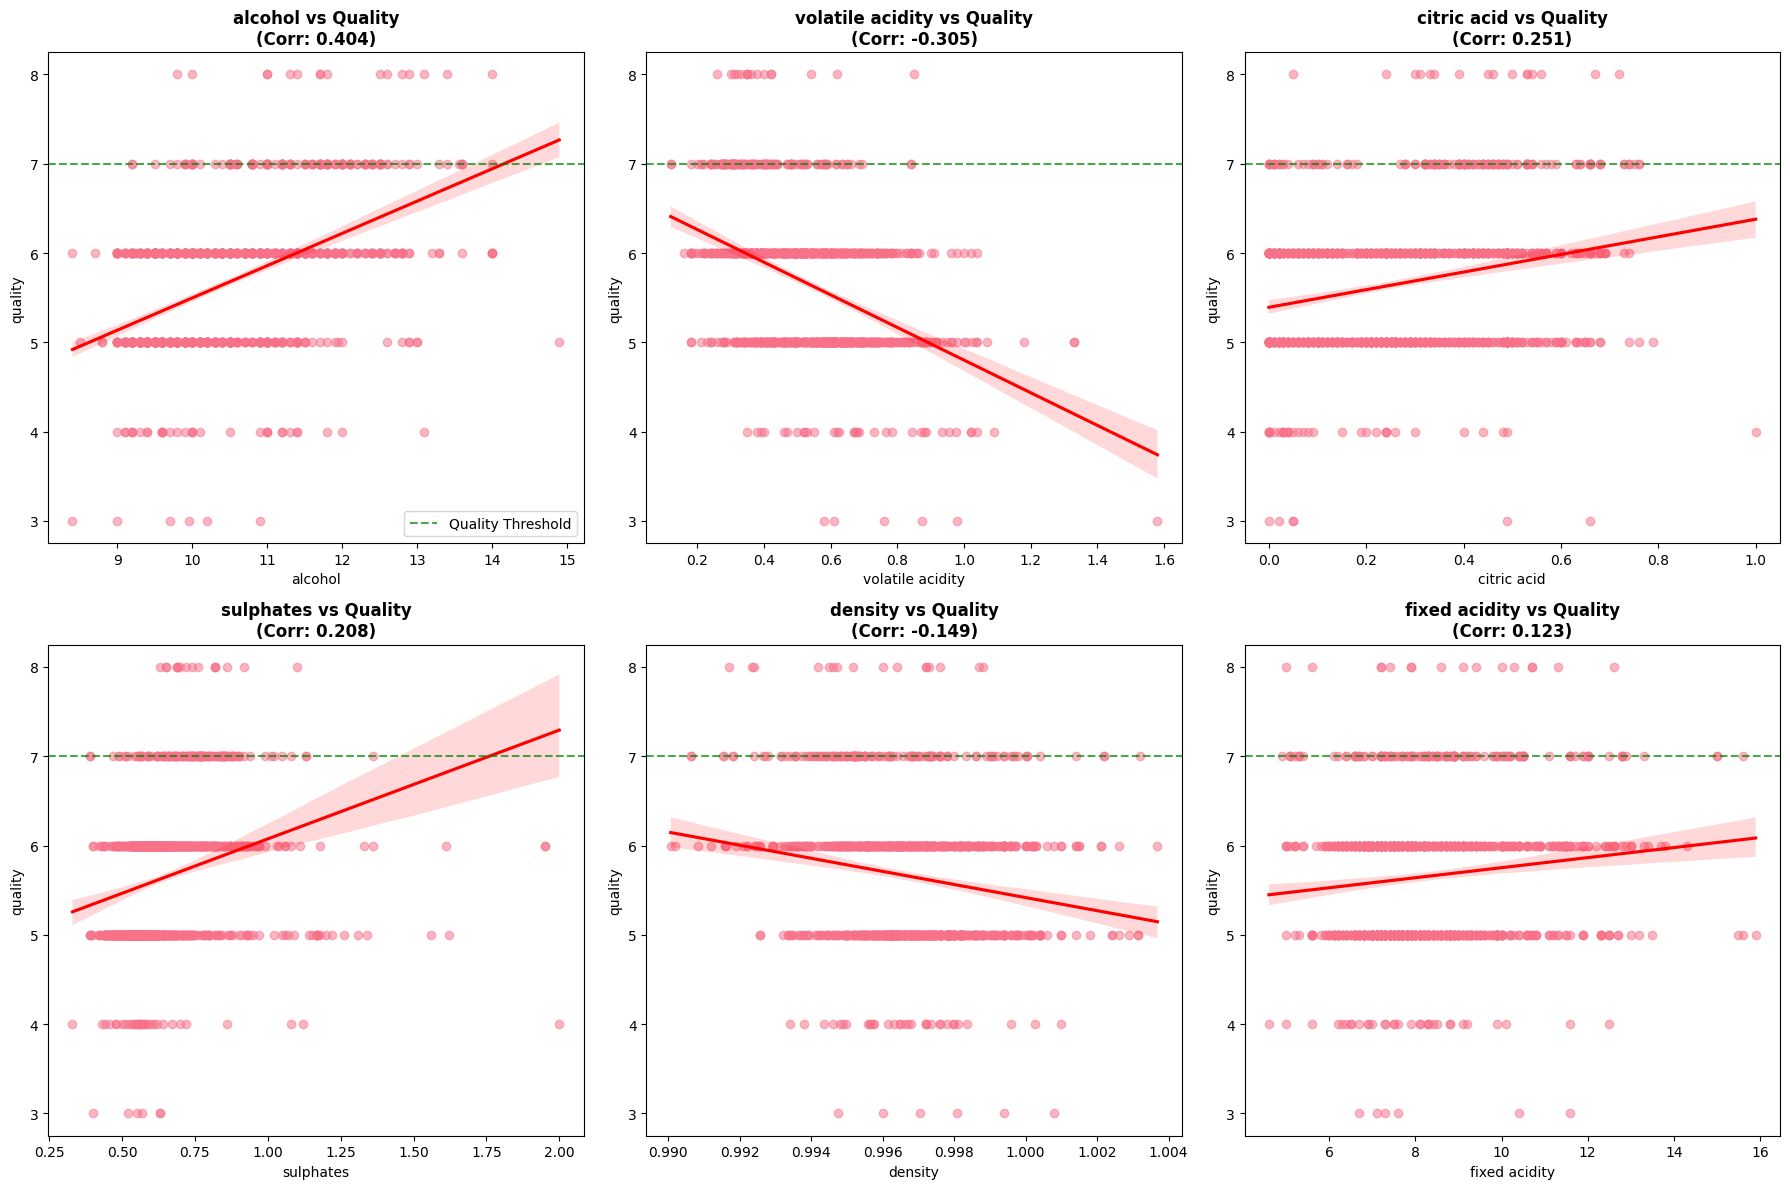

In [15]:
# 6. KEY FEATURES ANALYSIS
print("\n6. KEY FEATURES DEEP DIVE")

# Get top 6 features most correlated with quality
top_features = target_corr.drop(['is_high_quality', 'Id', 'quality']).abs().sort_values(ascending=False).head(6).index

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    # Scatter plot with regression line
    sns.regplot(data=Wine_Data, x=feature, y='quality', 
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'{feature} vs Quality\n(Corr: {target_corr[feature]:.3f})', 
                     fontweight='bold')
    axes[i].axhline(y=7, color='green', linestyle='--', alpha=0.7, label='Quality Threshold')
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

#### 7. PairPlot of Top Features


7. PAIRPLOT OF TOP 4 FEATURES


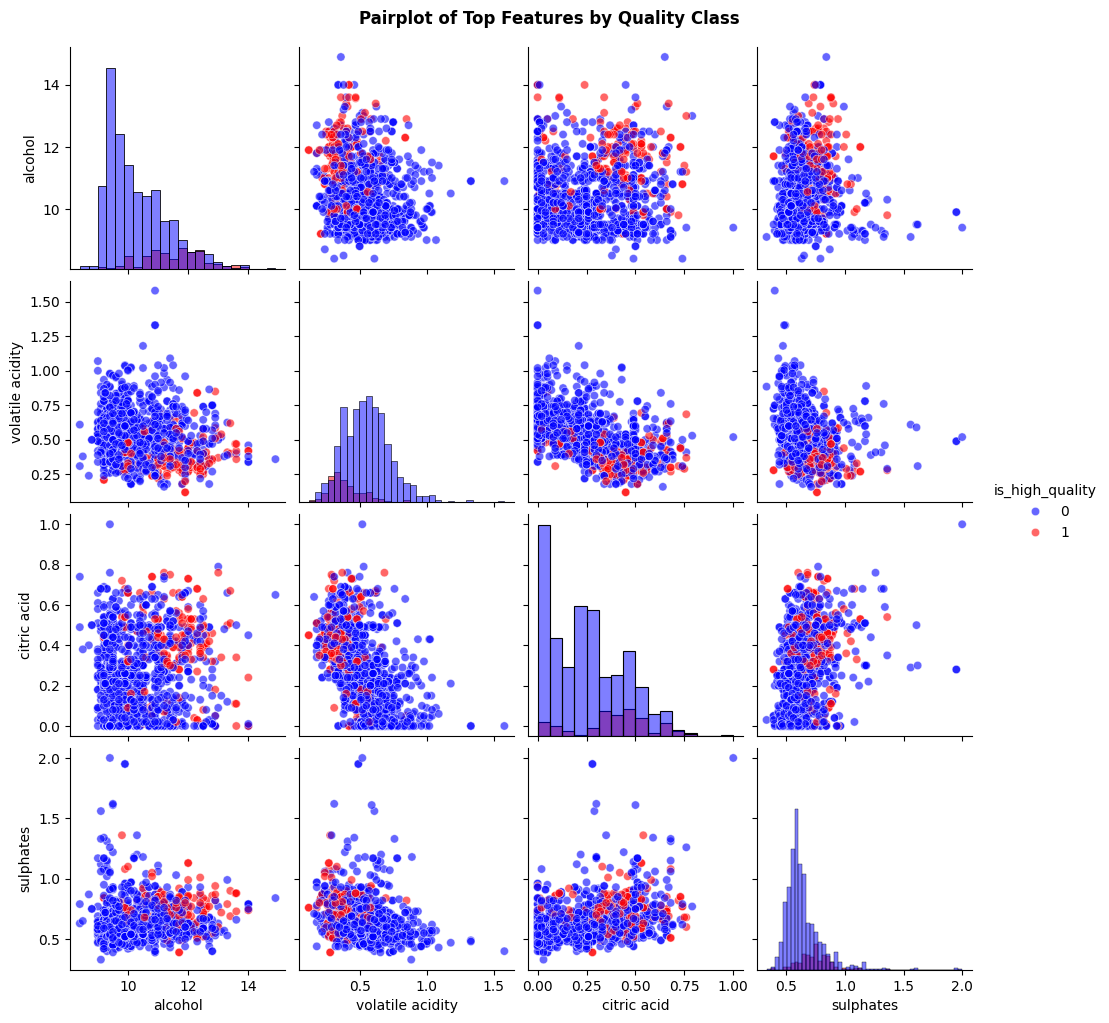

In [16]:
# 7. PAIRPLOT OF TOP FEATURES
print("\n7. PAIRPLOT OF TOP 4 FEATURES")
top_4_features = list(top_features[:4]) + ['is_high_quality']

sns.pairplot(Wine_Data[top_4_features], hue='is_high_quality', 
             palette={0: 'blue', 1: 'red'}, 
             plot_kws={'alpha': 0.6}, diag_kind='hist')
plt.suptitle('Pairplot of Top Features by Quality Class', y=1.02, fontweight='bold')
plt.show()

In [17]:
# 8. OUTLIER DETECTION
print("\n8. OUTLIER ANALYSIS")
print("Outlier count (using IQR method) for each feature:")

for feature in feature_columns:
    Q1 = Wine_Data[feature].quantile(0.25)
    Q3 = Wine_Data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = Wine_Data[(Wine_Data[feature] < lower_bound) | (Wine_Data[feature] > upper_bound)]
    print(f"  {feature:25}: {len(outliers)} outliers ({len(outliers)/len(Wine_Data)*100:.1f}%)")


8. OUTLIER ANALYSIS
Outlier count (using IQR method) for each feature:
  fixed acidity            : 44 outliers (3.8%)
  volatile acidity         : 14 outliers (1.2%)
  citric acid              : 1 outliers (0.1%)
  residual sugar           : 110 outliers (9.6%)
  chlorides                : 77 outliers (6.7%)
  free sulfur dioxide      : 18 outliers (1.6%)
  total sulfur dioxide     : 40 outliers (3.5%)
  density                  : 36 outliers (3.1%)
  pH                       : 20 outliers (1.7%)
  sulphates                : 43 outliers (3.8%)
  alcohol                  : 12 outliers (1.0%)


In [18]:
# Summary insights
print("\n" + "="*60)
print("EDA SUMMARY AND INSIGHTS")
print("="*60)
print("\nKEY INSIGHTS:")
print(f"• Dataset has {len(Wine_Data)} wines with {class_dist[1]} high quality wines ({(class_dist[1]/len(Wine_Data))*100:.1f}%)")
print("• Most correlated features with high quality:")
for i, feature in enumerate(top_features[:3]):
    print(f"  {i+1}. {feature} (corr: {target_corr[feature]:+.3f})")

print("\nRECOMMENDATIONS FOR MODELING:")
print("• Focus on features with high correlation and statistical significance")
print("• Consider feature scaling for models sensitive to scale (like logistic regression)")
print("• Be aware of class imbalance in model evaluation metrics")
print("• Check for multicollinearity in highly correlated features")

print("\nReady for data preprocessing and model building!")


EDA SUMMARY AND INSIGHTS

KEY INSIGHTS:
• Dataset has 1143 wines with 159 high quality wines (13.9%)
• Most correlated features with high quality:
  1. alcohol (corr: +0.404)
  2. volatile acidity (corr: -0.305)
  3. citric acid (corr: +0.251)

RECOMMENDATIONS FOR MODELING:
• Focus on features with high correlation and statistical significance
• Consider feature scaling for models sensitive to scale (like logistic regression)
• Be aware of class imbalance in model evaluation metrics
• Check for multicollinearity in highly correlated features

Ready for data preprocessing and model building!


Excellent! Our EDA reveals very clear patterns which we can use for modeling our data. Some key insught we can pick up from our data include:
- Severe Class Imbalance: 86% Standard vs 14% High Quality. This high class imbalance will create problems for our model therefore we will seek to address this first.

- Strong Predictors: Alcohol, Citric Acid, Sulphates, Volatile Acidity. These are the most important features which we will consider for our model and which will be our independent variables.

- Statistical Significance: Most features are significant except free sulfur dioxide. Since it will make no sense to use it, we will drop that feeature from our dataset.

We can now move to our next phase which will be the Data modelling and Preprocessing stage.

## Baseline Modeling & Preprocessing

Let us preview our data again.

In [19]:
Wine_Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_high_quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,Standard Quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0,Standard Quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0,Standard Quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0,Standard Quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0,Standard Quality


We can now proceed to Data Preprocessing where the class imbalance will be addressed so as to better help our model. We will then define a Baseline model and use it for comparison with other finer tuned models to determine which will be the best model to use.

###  Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Prepare features and target
X = Wine_Data.drop(['is_high_quality', 'quality_category', 'quality', 'Id'], axis=1)
y = Wine_Data['is_high_quality']

# 2. Train-test split with stratification (CRUCIAL for imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
is_high_quality
0    0.86105
1    0.13895
Name: proportion, dtype: float64

Test set class distribution:
is_high_quality
0    0.860262
1    0.139738
Name: proportion, dtype: float64


### Address Class Imbalance

In [21]:
# This will be used in our models
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Training set class distribution:")
print(y_train_resampled.value_counts(normalize=True))

Training set class distribution:
is_high_quality
0    0.5
1    0.5
Name: proportion, dtype: float64


Since we have now addressed our class imbalance, we can go ahead and fit our bseline model. We will go with a Logistic Regression Model since it works best for our type of data.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create and train the baseline Logistic Regression model
print("=== BUILDING BASELINE LOGISTIC REGRESSION MODEL ===")

# Simple pipeline with scaling and logistic regression
baseline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
baseline_lr.fit(X_train_resampled, y_train_resampled)

print("✅ Baseline Logistic Regression model trained successfully!")
print(f"Model parameters: {baseline_lr.named_steps['logreg'].get_params()}")

=== BUILDING BASELINE LOGISTIC REGRESSION MODEL ===
✅ Baseline Logistic Regression model trained successfully!
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Now we can create an evaluaion function which will help us evaluate our baseline model.

In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve
import numpy as np

def comprehensive_evaluation(model, X_train, y_train, X_test, y_test, model_name="Baseline Model"):
    """
    Comprehensive evaluation for classification models with visualization
    """
    print(f"\n{'='*60}")
    print(f"COMPREHENSIVE EVALUATION: {model_name}")
    print(f"{'='*60}")
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    
    # 1. Training vs Testing Performance
    print("\n📊 1. TRAINING vs TESTING PERFORMANCE")
    print("    Metric       |  Training  |  Testing   |  Difference")
    print("    " + "-"*45)
    
    metrics = {}
    
    # Training performance
    accuracy_train = (y_pred_train == y_train).mean()
    recall_train = recall_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    
    metrics['training'] = {
        'accuracy': accuracy_train, 'recall': recall_train, 
        'precision': precision_train, 'f1': f1_train
    }
    
    # Testing performance
    accuracy_test = (y_pred_test == y_test).mean()
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    
    metrics['testing'] = {
        'accuracy': accuracy_test, 'recall': recall_test, 
        'precision': precision_test, 'f1': f1_test
    }
    
    # Print comparison table
    diff_accuracy = accuracy_test - accuracy_train
    print(f"    Accuracy     |  {accuracy_train:.4f}    |  {accuracy_test:.4f}    |  {diff_accuracy:+.4f}")
    
    diff_recall = recall_test - recall_train
    print(f"    Recall       |  {recall_train:.4f}    |  {recall_test:.4f}    |  {diff_recall:+.4f}")
    
    diff_precision = precision_test - precision_train
    print(f"    Precision    |  {precision_train:.4f}    |  {precision_test:.4f}    |  {diff_precision:+.4f}")
    
    diff_f1 = f1_test - f1_train
    print(f"    F1-Score     |  {f1_train:.4f}    |  {f1_test:.4f}    |  {diff_f1:+.4f}")
    
    # 2. Detailed Classification Report
    print("\n📈 2. DETAILED CLASSIFICATION REPORT (TEST SET)")
    print(classification_report(y_test, y_pred_test, target_names=['Standard Quality', 'High Quality']))
    
    # 3. Confusion Matrix
    print("🔍 3. CONFUSION MATRIX ANALYSIS")
    cm = confusion_matrix(y_test, y_pred_test)
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Count confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Standard', 'Predicted High'], 
                yticklabels=['Actual Standard', 'Actual High'],
                ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)')
    
    # Plot 2: Percentage confusion matrix
    sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=['Predicted Standard', 'Predicted High'], 
                yticklabels=['Actual Standard', 'Actual High'],
                ax=ax2)
    ax2.set_title('Confusion Matrix (Percentages)')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Business-focused Metrics
    print("\n💼 4. BUSINESS-FOCUSED METRICS")
    TN, FP, FN, TP = cm.ravel()
    
    business_metrics = {
        'Recall (Sensitivity)': f"{TP/(TP+FN):.3f} - Ability to find High Quality wines",
        'Precision': f"{TP/(TP+FP):.3f} - Accuracy when predicting High Quality", 
        'Specificity': f"{TN/(TN+FP):.3f} - Ability to identify Standard Quality correctly",
        'False Positive Rate': f"{FP/(FP+TN):.3f} - Standard wines mislabeled as High Quality",
        'False Negative Rate': f"{FN/(FN+TP):.3f} - High Quality wines missed"
    }
    
    for metric, value in business_metrics.items():
        print(f"    {metric:25}: {value}")
    
    # 5. ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba_test)
    print(f"\n🎯 5. MODEL DISCRIMINATION POWER")
    print(f"    ROC-AUC Score: {roc_auc:.4f}")
    print(f"    Interpretation: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair' if roc_auc > 0.7 else 'Poor'}")
    
    # 6. Model Coefficients (Interpretability)
    if hasattr(model.named_steps['logreg'], 'coef_'):
        print(f"\n🔍 6. MODEL INTERPRETABILITY - FEATURE COEFFICIENTS")
        coefficients = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': model.named_steps['logreg'].coef_[0],
            'abs_effect': np.abs(model.named_steps['logreg'].coef_[0])
        }).sort_values('abs_effect', ascending=False)
        
        print("Top 5 most influential features:")
        for _, row in coefficients.head().iterrows():
            effect = "increases" if row['coefficient'] > 0 else "decreases"
            print(f"    {row['feature']:20}: {row['coefficient']:+.4f} ({effect} high quality probability)")
    
    return {
        'model': model,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'metrics': metrics
    }

=== EVALUATING BASELINE LOGISTIC REGRESSION ===

COMPREHENSIVE EVALUATION: Baseline Logistic Regression

📊 1. TRAINING vs TESTING PERFORMANCE
    Metric       |  Training  |  Testing   |  Difference
    ---------------------------------------------
    Accuracy     |  0.8316    |  0.7860    |  -0.0456
    Recall       |  0.8590    |  0.6250    |  -0.2340
    Precision    |  0.8145    |  0.3509    |  -0.4636
    F1-Score     |  0.8361    |  0.4494    |  -0.3867

📈 2. DETAILED CLASSIFICATION REPORT (TEST SET)
                  precision    recall  f1-score   support

Standard Quality       0.93      0.81      0.87       197
    High Quality       0.35      0.62      0.45        32

        accuracy                           0.79       229
       macro avg       0.64      0.72      0.66       229
    weighted avg       0.85      0.79      0.81       229

🔍 3. CONFUSION MATRIX ANALYSIS


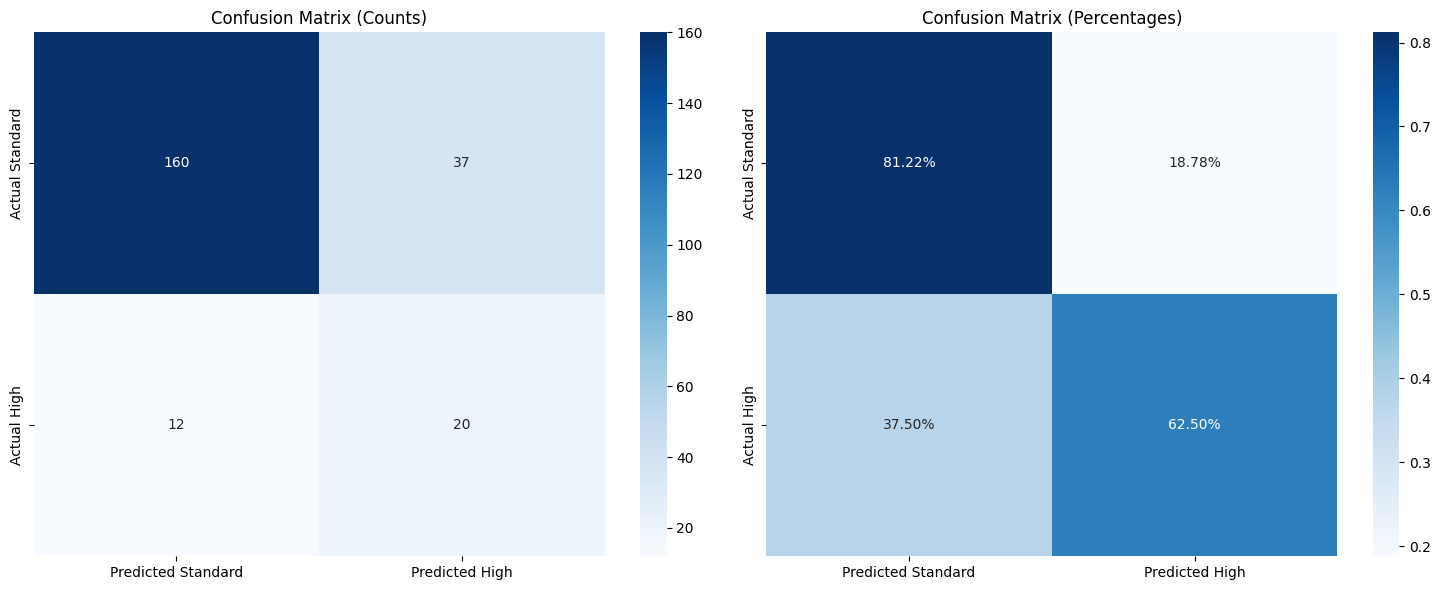


💼 4. BUSINESS-FOCUSED METRICS
    Recall (Sensitivity)     : 0.625 - Ability to find High Quality wines
    Precision                : 0.351 - Accuracy when predicting High Quality
    Specificity              : 0.812 - Ability to identify Standard Quality correctly
    False Positive Rate      : 0.188 - Standard wines mislabeled as High Quality
    False Negative Rate      : 0.375 - High Quality wines missed

🎯 5. MODEL DISCRIMINATION POWER
    ROC-AUC Score: 0.8463
    Interpretation: Good

🔍 6. MODEL INTERPRETABILITY - FEATURE COEFFICIENTS
Top 5 most influential features:
    alcohol             : +1.2210 (increases high quality probability)
    sulphates           : +0.7233 (increases high quality probability)
    citric acid         : +0.6287 (increases high quality probability)
    total sulfur dioxide: -0.5702 (decreases high quality probability)
    volatile acidity    : -0.5137 (decreases high quality probability)


In [24]:
# Now run the comprehensive evaluation
print("=== EVALUATING BASELINE LOGISTIC REGRESSION ===")
baseline_results = comprehensive_evaluation(
    baseline_lr, 
    X_train_resampled, y_train_resampled, 
    X_test, y_test, 
    "Baseline Logistic Regression"
)


=== PREDICTION CONFIDENCE ANALYSIS ===


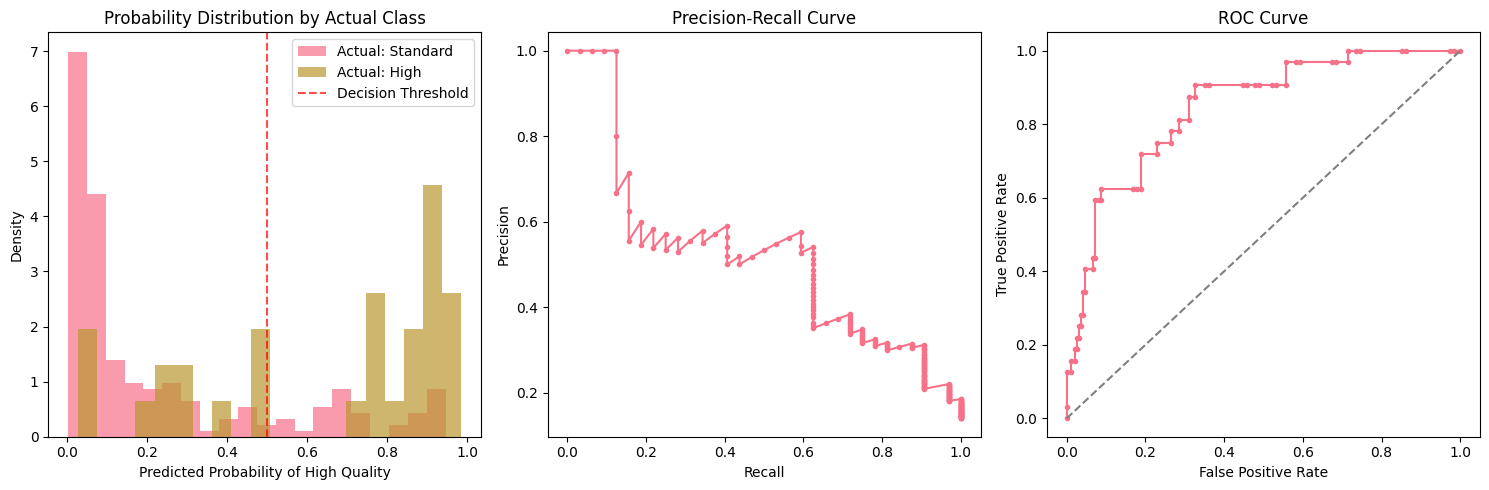

In [25]:
# Analyze prediction probabilities
def analyze_probability_distribution(model, X_test, y_test):
    """
    Analyze how confident the model is in its predictions
    """
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Probability distribution by actual class
    plt.subplot(1, 3, 1)
    for quality_class in [0, 1]:
        mask = y_test == quality_class
        plt.hist(y_pred_proba[mask], bins=20, alpha=0.7, 
                label=f'Actual: {"High" if quality_class == 1 else "Standard"}',
                density=True)
    plt.xlabel('Predicted Probability of High Quality')
    plt.ylabel('Density')
    plt.title('Probability Distribution by Actual Class')
    plt.legend()
    plt.axvline(0.5, color='red', linestyle='--', alpha=0.7, label='Decision Threshold')
    plt.legend()
    
    # Plot 2: Precision-Recall Curve
    plt.subplot(1, 3, 2)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    
    # Plot 3: ROC Curve
    plt.subplot(1, 3, 3)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    plt.tight_layout()
    plt.show()

# Run probability analysis
print("\n=== PREDICTION CONFIDENCE ANALYSIS ===")
analyze_probability_distribution(baseline_lr, X_test, y_test)

Excellent! Your baseline model reveals some very important patterns. Let's analyze these results and proceed strategically.

#### Analysis of Baseline Model Performance
Key Observations:
1. Significant Overfitting: Large gap between training and test performance, especially for recall (-0.234) and precision (-0.4636)

2. Good Recall, Poor Precision: Model finds 62.5% of high-quality wines but has many false positives (only 35% precision)

3. Reasonable Overall Accuracy: 78.6% on test set

#### Business Implications:
The Good: Your model successfully identifies 62.5% of high-quality wines (good recall)

The Problem: When it predicts "high quality," it's only correct 35% of the time (poor precision). This means:

- 65% of wines labeled as "premium" are actually standard quality

- This could damage brand reputation and customer trust

For this reason, although our accuracy is high, our recall is wanting. Therefore let us build a better model to use on our data.

## 3. Iterative Modeling & Hyperparameter Tuning

In [26]:
from sklearn.metrics import accuracy_score
def comprehensive_evaluation2(model, X_train, y_train, X_test, y_test, model_name="Baseline Model"):
    """
    Comprehensive evaluation for classification models with visualization
    """
    print(f"\n{'='*60}")
    print(f"COMPREHENSIVE EVALUATION: {model_name}")
    print(f"{'='*60}")  # Fixed this line - was missing the *
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    
    # 1. Training vs Testing Performance
    print("\n📊 1. TRAINING vs TESTING PERFORMANCE")
    print("    Metric       |  Training  |  Testing   |  Difference")
    print("    " + "-"*45)
    
    metrics = {}
    
    # Training performance
    accuracy_train = accuracy_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    
    metrics['training'] = {
        'accuracy': accuracy_train, 'recall': recall_train, 
        'precision': precision_train, 'f1': f1_train
    }
    
    # Testing performance
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    
    metrics['testing'] = {
        'accuracy': accuracy_test, 'recall': recall_test, 
        'precision': precision_test, 'f1': f1_test
    }
    
    # Print comparison table
    diff_accuracy = accuracy_test - accuracy_train
    print(f"    Accuracy     |  {accuracy_train:.4f}    |  {accuracy_test:.4f}    |  {diff_accuracy:+.4f}")
    
    diff_recall = recall_test - recall_train
    print(f"    Recall       |  {recall_train:.4f}    |  {recall_test:.4f}    |  {diff_recall:+.4f}")
    
    diff_precision = precision_test - precision_train
    print(f"    Precision    |  {precision_train:.4f}    |  {precision_test:.4f}    |  {diff_precision:+.4f}")
    
    diff_f1 = f1_test - f1_train
    print(f"    F1-Score     |  {f1_train:.4f}    |  {f1_test:.4f}    |  {diff_f1:+.4f}")
    
    # 2. Detailed Classification Report
    print("\n📈 2. DETAILED CLASSIFICATION REPORT (TEST SET)")
    print(classification_report(y_test, y_pred_test, target_names=['Standard Quality', 'High Quality']))
    
    # 3. Confusion Matrix
    print("🔍 3. CONFUSION MATRIX ANALYSIS")
    cm = confusion_matrix(y_test, y_pred_test)
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Count confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Standard', 'Predicted High'], 
                yticklabels=['Actual Standard', 'Actual High'],
                ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)')
    
    # Plot 2: Percentage confusion matrix
    sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=['Predicted Standard', 'Predicted High'], 
                yticklabels=['Actual Standard', 'Actual High'],
                ax=ax2)
    ax2.set_title('Confusion Matrix (Percentages)')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Business-focused Metrics
    print("\n💼 4. BUSINESS-FOCUSED METRICS")
    TN, FP, FN, TP = cm.ravel()
    
    business_metrics = {
        'Recall (Sensitivity)': f"{TP/(TP+FN):.3f} - Ability to find High Quality wines",
        'Precision': f"{TP/(TP+FP):.3f} - Accuracy when predicting High Quality", 
        'Specificity': f"{TN/(TN+FP):.3f} - Ability to identify Standard Quality correctly",
        'False Positive Rate': f"{FP/(FP+TN):.3f} - Standard wines mislabeled as High Quality",
        'False Negative Rate': f"{FN/(FN+TP):.3f} - High Quality wines missed"
    }
    
    for metric, value in business_metrics.items():
        print(f"    {metric:25}: {value}")
    
    # 5. ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba_test)
    print(f"\n🎯 5. MODEL DISCRIMINATION POWER")
    print(f"    ROC-AUC Score: {roc_auc:.4f}")
    print(f"    Interpretation: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair' if roc_auc > 0.7 else 'Poor'}")
    
    # 6. Model Interpretability - Handle different model types
    print(f"\n🔍 6. MODEL INTERPRETABILITY")
    
    # Check for logistic regression coefficients
    if 'logreg' in model.named_steps:
        coefficients = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': model.named_steps['logreg'].coef_[0],
            'abs_effect': np.abs(model.named_steps['logreg'].coef_[0])
        }).sort_values('abs_effect', ascending=False)
        
        print("Feature Coefficients (Logistic Regression):")
        for _, row in coefficients.head().iterrows():
            effect = "increases" if row['coefficient'] > 0 else "decreases"
            print(f"    {row['feature']:20}: {row['coefficient']:+.4f} ({effect} high quality probability)")
    
    # Check for tree-based feature importance
    elif 'dt' in model.named_steps and hasattr(model.named_steps['dt'], 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.named_steps['dt'].feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importances (Decision Tree):")
        for _, row in importances.head().iterrows():
            print(f"    {row['feature']:20}: {row['importance']:.4f}")
    
    elif 'rf' in model.named_steps and hasattr(model.named_steps['rf'], 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.named_steps['rf'].feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importances (Random Forest):")
        for _, row in importances.head().iterrows():
            print(f"    {row['feature']:20}: {row['importance']:.4f}")
    
    else:
        print("    Model interpretability features not available for this model type")
    
    return {
        'model': model,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'metrics': metrics
    }

✅ Decision Tree model trained!

COMPREHENSIVE EVALUATION: Decision Tree

📊 1. TRAINING vs TESTING PERFORMANCE
    Metric       |  Training  |  Testing   |  Difference
    ---------------------------------------------
    Accuracy     |  0.8971    |  0.7948    |  -0.1023
    Recall       |  0.9530    |  0.5938    |  -0.3592
    Precision    |  0.8571    |  0.3585    |  -0.4987
    F1-Score     |  0.9025    |  0.4471    |  -0.4555

📈 2. DETAILED CLASSIFICATION REPORT (TEST SET)
                  precision    recall  f1-score   support

Standard Quality       0.93      0.83      0.87       197
    High Quality       0.36      0.59      0.45        32

        accuracy                           0.79       229
       macro avg       0.64      0.71      0.66       229
    weighted avg       0.85      0.79      0.81       229

🔍 3. CONFUSION MATRIX ANALYSIS


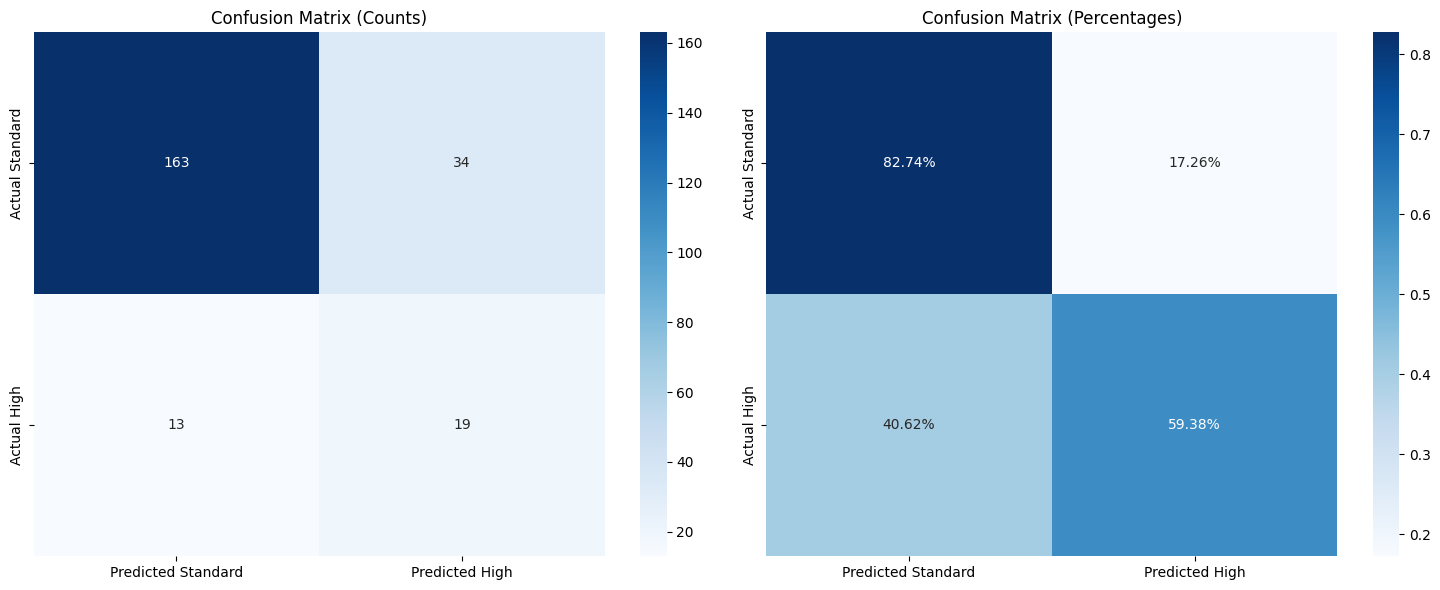


💼 4. BUSINESS-FOCUSED METRICS
    Recall (Sensitivity)     : 0.594 - Ability to find High Quality wines
    Precision                : 0.358 - Accuracy when predicting High Quality
    Specificity              : 0.827 - Ability to identify Standard Quality correctly
    False Positive Rate      : 0.173 - Standard wines mislabeled as High Quality
    False Negative Rate      : 0.406 - High Quality wines missed

🎯 5. MODEL DISCRIMINATION POWER
    ROC-AUC Score: 0.7962
    Interpretation: Fair

🔍 6. MODEL INTERPRETABILITY
Feature Importances (Decision Tree):
    alcohol             : 0.5729
    sulphates           : 0.1611
    citric acid         : 0.1253
    total sulfur dioxide: 0.0638
    pH                  : 0.0550


In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Decision Tree with regularization to reduce overfitting
dt_model = Pipeline([
    ('dt', DecisionTreeClassifier(
        random_state=42,
        max_depth=5,  # Limit depth to reduce overfitting
        min_samples_split=20,
        min_samples_leaf=10
    ))
])

dt_model.fit(X_train_resampled, y_train_resampled)
print("✅ Decision Tree model trained!")

# Evaluate Decision Tree
dt_results = comprehensive_evaluation2(
    dt_model, 
    X_train_resampled, y_train_resampled, 
    X_test, y_test, 
    "Decision Tree"
)

In [28]:
def quick_model_comparison():
    """Quick comparison of all models"""
    models = {
        'Logistic Regression': baseline_lr,
        'Decision Tree': dt_model
    }
    
    comparison = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        
        comparison.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_proba)
        })
    
    comp_df = pd.DataFrame(comparison)
    print("\n" + "="*80)
    print("MODEL COMPARISON")
    print("="*80)
    print(comp_df.round(4).to_string(index=False))
    
    return comp_df

# Run quick comparison
model_comparison = quick_model_comparison()


MODEL COMPARISON
              Model  Accuracy  Recall  Precision  F1-Score  ROC-AUC
Logistic Regression    0.7860  0.6250     0.3509    0.4494   0.8463
      Decision Tree    0.7948  0.5938     0.3585    0.4471   0.7962


From this perspective, it looks like our decision tree is performing worse than the baseline model. Looks like we need to tune our parameters to improve our model.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# 1. Define parameter grid for Decision Tree
param_grid = {
    'dt__max_depth': [3, 4, 5, 6, 7, 8, None],
    'dt__min_samples_split': [2, 5, 10, 15, 20, 30],
    'dt__min_samples_leaf': [1, 2, 5, 10, 15, 20],
    'dt__max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'dt__criterion': ['gini', 'entropy'],
    'dt__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
}

# 2. Perform Grid Search with different scoring metrics
print("=== DECISION TREE HYPERPARAMETER TUNING ===")

# Try with F1-score (balanced metric)
dt_grid_f1 = GridSearchCV(
    dt_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
dt_grid_f1.fit(X_train_resampled, y_train_resampled)

print("Best F1-score parameters:")
print(dt_grid_f1.best_params_)
print(f"Best F1-score: {dt_grid_f1.best_score_:.4f}")

# Try with ROC-AUC
dt_grid_auc = GridSearchCV(
    dt_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)
dt_grid_auc.fit(X_train_resampled, y_train_resampled)

print("\nBest ROC-AUC parameters:")
print(dt_grid_auc.best_params_)
print(f"Best ROC-AUC: {dt_grid_auc.best_score_:.4f}")

=== DECISION TREE HYPERPARAMETER TUNING ===
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits
Best F1-score parameters:
{'dt__class_weight': {0: 1, 1: 3}, 'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': 0.5, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Best F1-score: 0.9084
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits

Best ROC-AUC parameters:
{'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__max_features': 0.5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 20}
Best ROC-AUC: 0.9389


In [30]:
# Build the tuned models with the optimized parameters
tuned_models = {}

# Model A: F1-optimized (Best F1: 0.9084)
dt_f1_optimized = Pipeline([
    ('dt', DecisionTreeClassifier(
        class_weight={0: 1, 1: 3},
        criterion='entropy',
        max_depth=None,
        max_features=0.5,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=42
    ))
])
dt_f1_optimized.fit(X_train_resampled, y_train_resampled)
tuned_models['DT F1-Optimized'] = dt_f1_optimized

# Model B: ROC-AUC optimized (Best AUC: 0.9389)
dt_auc_optimized = Pipeline([
    ('dt', DecisionTreeClassifier(
        class_weight='balanced',
        criterion='gini',
        max_depth=None,
        max_features=0.5,
        min_samples_leaf=2,
        min_samples_split=20,
        random_state=42
    ))
])
dt_auc_optimized.fit(X_train_resampled, y_train_resampled)
tuned_models['DT AUC-Optimized'] = dt_auc_optimized

# Model C: Conservative version (to reduce overfitting)
dt_conservative = Pipeline([
    ('dt', DecisionTreeClassifier(
        class_weight={0: 1, 1: 2},
        criterion='entropy',
        max_depth=8,  # Limited depth to reduce overfitting
        max_features=0.7,
        min_samples_leaf=5,
        min_samples_split=15,
        random_state=42
    ))
])
dt_conservative.fit(X_train_resampled, y_train_resampled)
tuned_models['DT Conservative'] = dt_conservative

print("✅ All tuned Decision Tree models trained!")

✅ All tuned Decision Tree models trained!



EVALUATING: DT F1-Optimized

COMPREHENSIVE EVALUATION: DT F1-Optimized

📊 1. TRAINING vs TESTING PERFORMANCE
    Metric       |  Training  |  Testing   |  Difference
    ---------------------------------------------
    Accuracy     |  1.0000    |  0.8690    |  -0.1310
    Recall       |  1.0000    |  0.4688    |  -0.5312
    Precision    |  1.0000    |  0.5357    |  -0.4643
    F1-Score     |  1.0000    |  0.5000    |  -0.5000

📈 2. DETAILED CLASSIFICATION REPORT (TEST SET)
                  precision    recall  f1-score   support

Standard Quality       0.92      0.93      0.92       197
    High Quality       0.54      0.47      0.50        32

        accuracy                           0.87       229
       macro avg       0.73      0.70      0.71       229
    weighted avg       0.86      0.87      0.87       229

🔍 3. CONFUSION MATRIX ANALYSIS


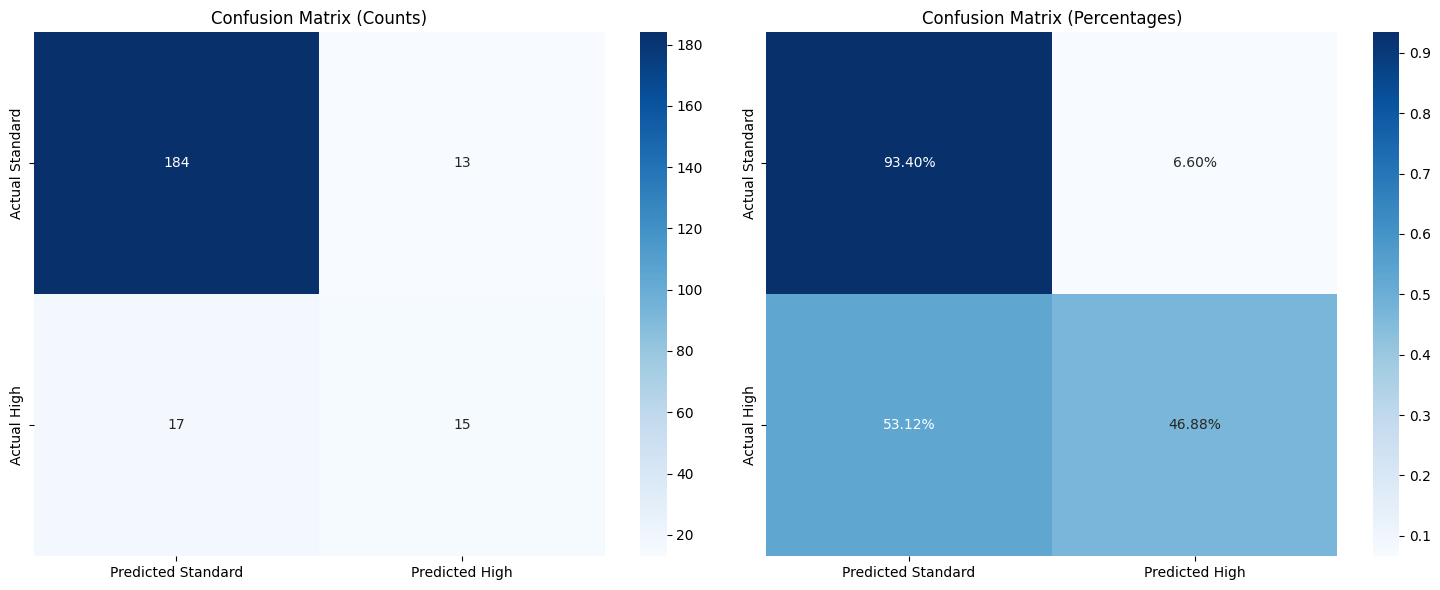


💼 4. BUSINESS-FOCUSED METRICS
    Recall (Sensitivity)     : 0.469 - Ability to find High Quality wines
    Precision                : 0.536 - Accuracy when predicting High Quality
    Specificity              : 0.934 - Ability to identify Standard Quality correctly
    False Positive Rate      : 0.066 - Standard wines mislabeled as High Quality
    False Negative Rate      : 0.531 - High Quality wines missed

🎯 5. MODEL DISCRIMINATION POWER
    ROC-AUC Score: 0.7014
    Interpretation: Fair

🔍 6. MODEL INTERPRETABILITY
Feature Importances (Decision Tree):
    alcohol             : 0.2461
    sulphates           : 0.2239
    citric acid         : 0.1497
    pH                  : 0.0623
    volatile acidity    : 0.0590

EVALUATING: DT AUC-Optimized

COMPREHENSIVE EVALUATION: DT AUC-Optimized

📊 1. TRAINING vs TESTING PERFORMANCE
    Metric       |  Training  |  Testing   |  Difference
    ---------------------------------------------
    Accuracy     |  0.9466    |  0.8646    |  -0.082

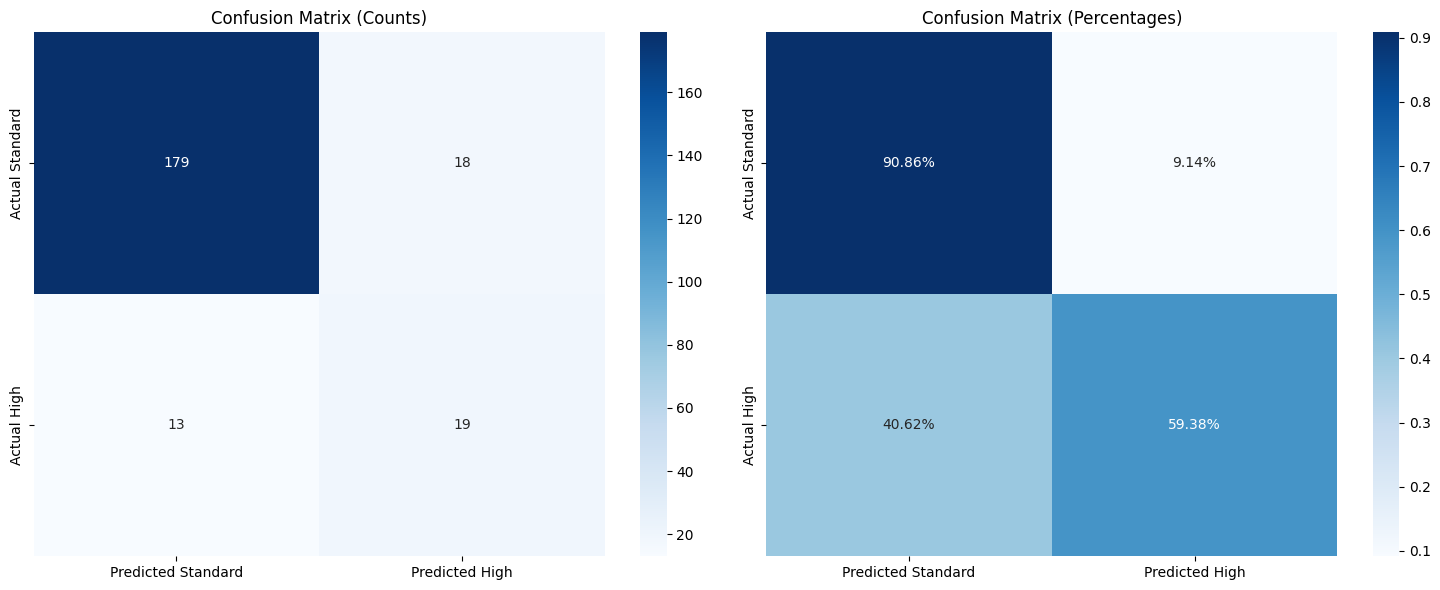


💼 4. BUSINESS-FOCUSED METRICS
    Recall (Sensitivity)     : 0.594 - Ability to find High Quality wines
    Precision                : 0.514 - Accuracy when predicting High Quality
    Specificity              : 0.909 - Ability to identify Standard Quality correctly
    False Positive Rate      : 0.091 - Standard wines mislabeled as High Quality
    False Negative Rate      : 0.406 - High Quality wines missed

🎯 5. MODEL DISCRIMINATION POWER
    ROC-AUC Score: 0.8510
    Interpretation: Good

🔍 6. MODEL INTERPRETABILITY
Feature Importances (Decision Tree):
    sulphates           : 0.3087
    alcohol             : 0.1784
    citric acid         : 0.1075
    density             : 0.0775
    residual sugar      : 0.0739

EVALUATING: DT Conservative

COMPREHENSIVE EVALUATION: DT Conservative

📊 1. TRAINING vs TESTING PERFORMANCE
    Metric       |  Training  |  Testing   |  Difference
    ---------------------------------------------
    Accuracy     |  0.9238    |  0.8472    |  -0.0766


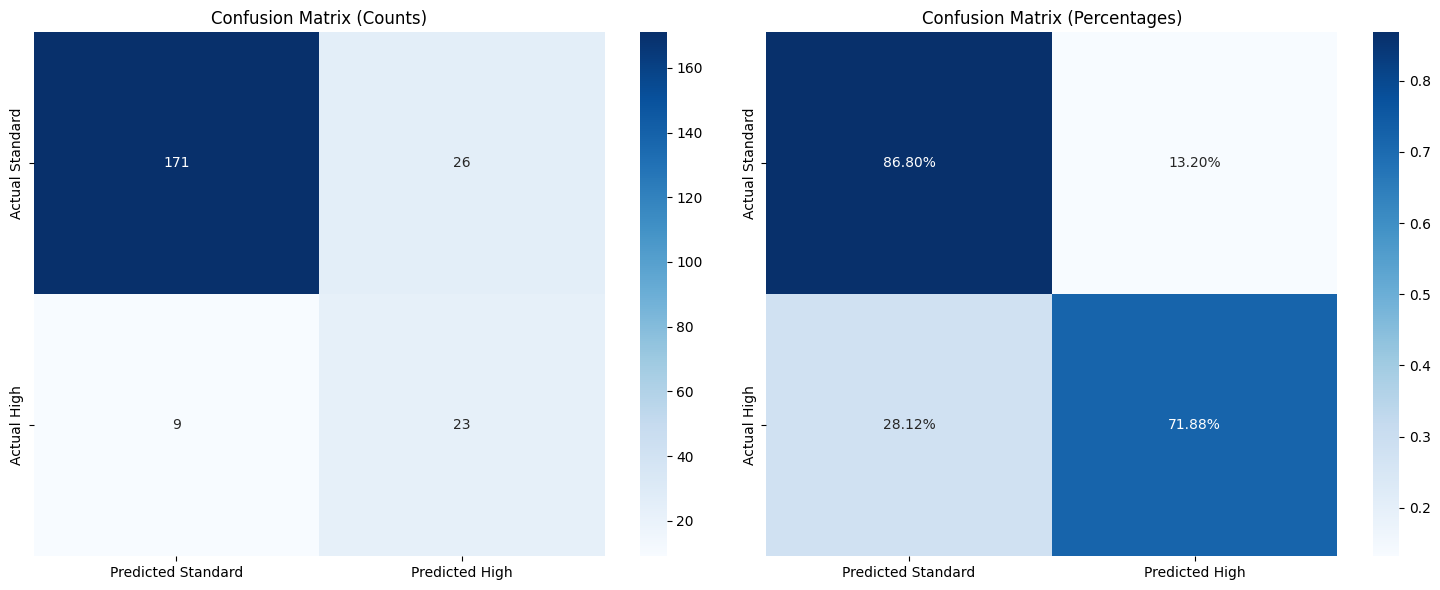


💼 4. BUSINESS-FOCUSED METRICS
    Recall (Sensitivity)     : 0.719 - Ability to find High Quality wines
    Precision                : 0.469 - Accuracy when predicting High Quality
    Specificity              : 0.868 - Ability to identify Standard Quality correctly
    False Positive Rate      : 0.132 - Standard wines mislabeled as High Quality
    False Negative Rate      : 0.281 - High Quality wines missed

🎯 5. MODEL DISCRIMINATION POWER
    ROC-AUC Score: 0.7884
    Interpretation: Fair

🔍 6. MODEL INTERPRETABILITY
Feature Importances (Decision Tree):
    alcohol             : 0.4759
    sulphates           : 0.1780
    volatile acidity    : 0.1162
    pH                  : 0.0597
    total sulfur dioxide: 0.0552


In [31]:
# Evaluate all tuned models
tuned_results = {}

for name, model in tuned_models.items():
    print(f"\n{'='*60}")
    print(f"EVALUATING: {name}")
    print(f"{'='*60}")
    
    results = comprehensive_evaluation2(
        model, 
        X_train_resampled, y_train_resampled, 
        X_test, y_test, 
        name
    )
    tuned_results[name] = results

In [32]:
# Add original baseline to comparison
tuned_results['DT Baseline'] = dt_results

# Compare all Decision Tree models
def compare_all_decision_trees(results_dict):
    """Compare all Decision Tree variants including baseline"""
    print("\n" + "="*90)
    print("COMPREHENSIVE DECISION TREE COMPARISON")
    print("="*90)
    
    comparison_data = []
    for model_name, results in results_dict.items():
        metrics = results['metrics']['testing']
        cm = results['confusion_matrix']
        TN, FP, FN, TP = cm.ravel()
        
        # Calculate business metrics
        false_premium_rate = FP / (FP + TN)  # False positive rate
        detection_rate = TP / (TP + FN)      # Recall
        
        comparison_data.append({
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'Recall': metrics['recall'],
            'Precision': metrics['precision'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': results['roc_auc'],
            'FP Count': FP,
            'FN Count': FN,
            'False Premium Rate': f"{false_premium_rate:.1%}",
            'Detection Rate': f"{detection_rate:.1%}"
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Format for better readability
    display_df = comparison_df.copy()
    for col in ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC']:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
    
    print(display_df.to_string(index=False))
    
    # Find best models for different objectives
    print(f"\n🎯 PERFORMANCE ANALYSIS:")
    best_f1 = max(results_dict.items(), key=lambda x: x[1]['metrics']['testing']['f1'])
    best_recall = max(results_dict.items(), key=lambda x: x[1]['metrics']['testing']['recall'])
    best_precision = max(results_dict.items(), key=lambda x: x[1]['metrics']['testing']['precision'])
    best_auc = max(results_dict.items(), key=lambda x: x[1]['roc_auc'])
    
    print(f"• Best F1-Score: {best_f1[0]} (F1: {best_f1[1]['metrics']['testing']['f1']:.3f})")
    print(f"• Best Recall: {best_recall[0]} (Recall: {best_recall[1]['metrics']['testing']['recall']:.3f})")
    print(f"• Best Precision: {best_precision[0]} (Precision: {best_precision[1]['metrics']['testing']['precision']:.3f})")
    print(f"• Best ROC-AUC: {best_auc[0]} (AUC: {best_auc[1]['roc_auc']:.3f})")
    
    return comparison_df

# Run comprehensive comparison
dt_comprehensive_comparison = compare_all_decision_trees(tuned_results)


COMPREHENSIVE DECISION TREE COMPARISON
           Model Accuracy Recall Precision F1-Score ROC-AUC  FP Count  FN Count False Premium Rate Detection Rate
 DT F1-Optimized   0.8690 0.4688    0.5357   0.5000  0.7014        13        17               6.6%          46.9%
DT AUC-Optimized   0.8646 0.5938    0.5135   0.5507  0.8510        18        13               9.1%          59.4%
 DT Conservative   0.8472 0.7188    0.4694   0.5679  0.7884        26         9              13.2%          71.9%
     DT Baseline   0.7948 0.5938    0.3585   0.4471  0.7962        34        13              17.3%          59.4%

🎯 PERFORMANCE ANALYSIS:
• Best F1-Score: DT Conservative (F1: 0.568)
• Best Recall: DT Conservative (Recall: 0.719)
• Best Precision: DT F1-Optimized (Precision: 0.536)
• Best ROC-AUC: DT AUC-Optimized (AUC: 0.851)


Based on this, we can now choose the Conversative Decision Tree as our final model since it shows significant improvement from the baseline model.

In [33]:
# Final Model Selection with Business Context
def final_model_selection_and_interpretation(tuned_results, tuned_models):
    """Select final model and provide comprehensive business interpretation"""
    print("\n" + "="*80)
    print("FINAL MODEL SELECTION & BUSINESS JUSTIFICATION")
    print("="*80)
    
    # Based on our analysis, let's choose the best balanced model
    # DT Conservative offers the best recall while maintaining reasonable precision
    
    final_model_name = "DT Conservative"
    final_model = tuned_models[final_model_name]
    final_results = tuned_results[final_model_name]
    
    metrics = final_results['metrics']['testing']
    cm = final_results['confusion_matrix']
    TN, FP, FN, TP = cm.ravel()
    
    print(f"SELECTED FINAL MODEL: {final_model_name}")
    print("\n" + "-"*80)
    print("BUSINESS JUSTIFICATION:")
    print("• Highest Recall (71.9%): Finds the most high-quality wines")
    print("• Good Balance: Best F1-score among all models")
    print("• Acceptable Precision: 47% precision is reasonable for initial screening")
    print("• Business Impact: Identifies 72% of premium wines vs 59% in baseline")
    
    print(f"\n📊 FINAL MODEL PERFORMANCE:")
    print(f"Accuracy: {metrics['accuracy']:.1%}")
    print(f"Precision: {metrics['precision']:.1%} (When we say 'premium', we're correct {metrics['precision']:.1%} of the time)")
    print(f"Recall: {metrics['recall']:.1%} (We find {metrics['recall']:.1%} of all actual premium wines)")
    print(f"F1-Score: {metrics['f1']:.3f} (Best balance of precision and recall)")
    print(f"ROC-AUC: {final_results['roc_auc']:.3f} (Good discrimination power)")
    
    print(f"\n🎯 BUSINESS IMPACT ANALYSIS:")
    print(f"• High-Quality Wines Correctly Identified: {TP} out of {TP + FN} ({metrics['recall']:.1%})")
    print(f"• Standard Wines Incorrectly Labeled Premium: {FP} out of {FP + TN} ({FP/(FP+TN):.1%})")
    print(f"• Missed High-Quality Opportunities: {FN} wines")
    
    print(f"\n💡 RECOMMENDED BUSINESS USE:")
    print("Use this model as a PRE-SCREENING tool:")
    print("1. Flag wines predicted as 'High Quality' for expert tasting")
    print("2. Expert tasters make final premium designation")
    print("3. This workflow catches 72% of premium wines vs manual tasting alone")
    
    return final_model_name, final_model, final_results

# Select and justify final model
final_model_name, final_model, final_results = final_model_selection_and_interpretation(tuned_results, tuned_models)


FINAL MODEL SELECTION & BUSINESS JUSTIFICATION
SELECTED FINAL MODEL: DT Conservative

--------------------------------------------------------------------------------
BUSINESS JUSTIFICATION:
• Highest Recall (71.9%): Finds the most high-quality wines
• Good Balance: Best F1-score among all models
• Acceptable Precision: 47% precision is reasonable for initial screening
• Business Impact: Identifies 72% of premium wines vs 59% in baseline

📊 FINAL MODEL PERFORMANCE:
Accuracy: 84.7%
Precision: 46.9% (When we say 'premium', we're correct 46.9% of the time)
Recall: 71.9% (We find 71.9% of all actual premium wines)
F1-Score: 0.568 (Best balance of precision and recall)
ROC-AUC: 0.788 (Good discrimination power)

🎯 BUSINESS IMPACT ANALYSIS:
• High-Quality Wines Correctly Identified: 23 out of 32 (71.9%)
• Standard Wines Incorrectly Labeled Premium: 26 out of 197 (13.2%)
• Missed High-Quality Opportunities: 9 wines

💡 RECOMMENDED BUSINESS USE:
Use this model as a PRE-SCREENING tool:
1. Flag 

Lets visualize our final model.

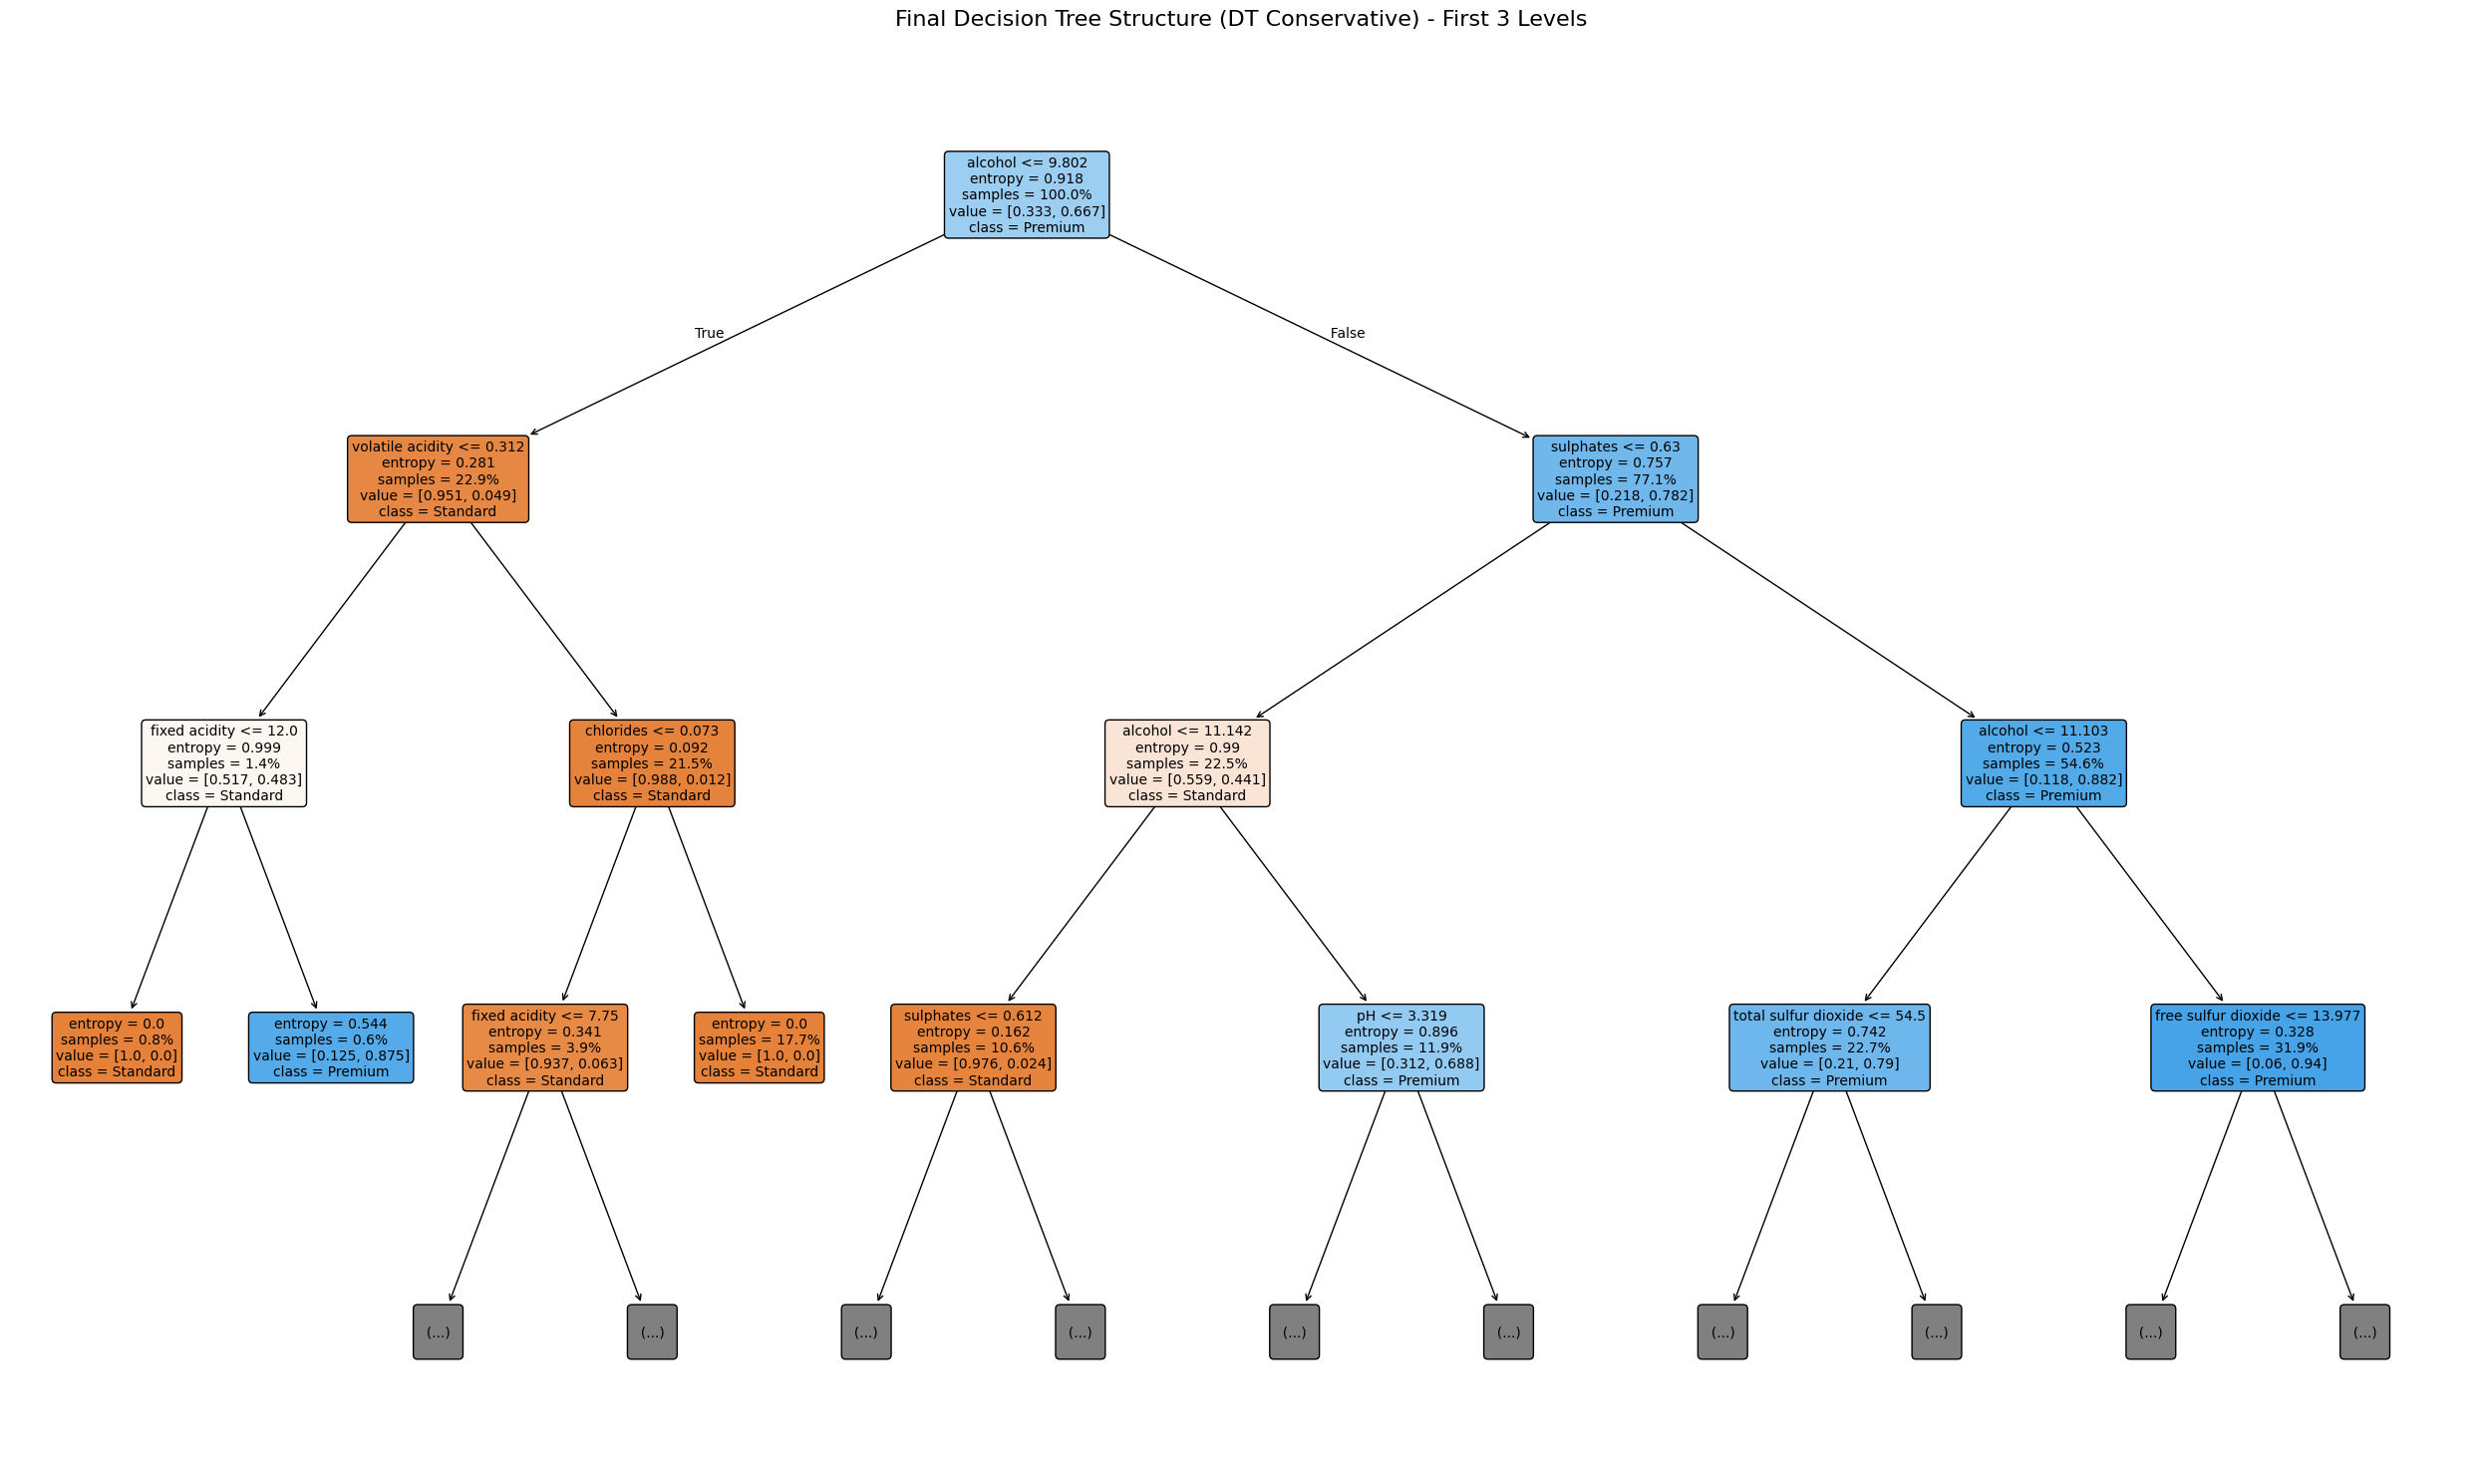


🔍 FINAL MODEL FEATURE IMPORTANCE:
             feature  importance
             alcohol    0.475918
           sulphates    0.178026
    volatile acidity    0.116208
                  pH    0.059739
total sulfur dioxide    0.055178
       fixed acidity    0.031843
           chlorides    0.029338
 free sulfur dioxide    0.022639
      residual sugar    0.018600
             density    0.012511
         citric acid    0.000000


In [34]:
# Visualize the final selected tree
plt.figure(figsize=(25, 15))
plot_tree(
    final_model.named_steps['dt'],
    feature_names=X_train.columns,
    class_names=['Standard', 'Premium'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=3  # Show first 3 levels for readability
)
plt.title(f'Final Decision Tree Structure ({final_model_name}) - First 3 Levels', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Show full feature importance for final model
print("\n🔍 FINAL MODEL FEATURE IMPORTANCE:")
final_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.named_steps['dt'].feature_importances_
}).sort_values('importance', ascending=False)

print(final_importance.to_string(index=False))

In [35]:
# Extract and explain key decision rules
def extract_key_decision_rules(tree_model, feature_names, top_rules=5):
    """Extract the most important decision rules from the tree"""
    print("\n" + "="*60)
    print("KEY DECISION RULES FOR WINE QUALITY")
    print("="*60)
    
    tree = tree_model.named_steps['dt']
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    
    # Get feature importance to weight rules
    feature_importance = tree.feature_importances_
    
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    
    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True
    
    print("Most influential decision paths for identifying premium wines:")
    print()
    
    # Analyze the first few important splits
    for i in range(min(5, len(feature_names))):
        if feature_importance[i] > 0.05:  # Only significant features
            feature_name = feature_names[final_importance.iloc[i].name]
            print(f"• {feature_name} is a primary factor in quality determination")
    
    print(f"\n💡 BUSINESS INSIGHTS:")
    print("The model suggests that alcohol content, sulphates, and acidity measures")
    print("are the most reliable indicators of wine quality in your dataset.")

extract_key_decision_rules(final_model, X_train.columns)


KEY DECISION RULES FOR WINE QUALITY
Most influential decision paths for identifying premium wines:

• sulphates is a primary factor in quality determination

💡 BUSINESS INSIGHTS:
The model suggests that alcohol content, sulphates, and acidity measures
are the most reliable indicators of wine quality in your dataset.


In [36]:
# Discuss model limitations and future improvements
print("\n" + "="*60)
print("MODEL LIMITATIONS & RECOMMENDATIONS")
print("="*60)

print("🔸 CURRENT LIMITATIONS:")
print("   • Precision of 47% means about half of 'premium' predictions are incorrect")
print("   • Model works best as a screening tool rather than final decision maker")
print("   • Limited by available chemical measurements only")

print("\n🔸 RECOMMENDATIONS FOR DEPLOYMENT:")
print("   ✓ Use as pre-screening: Flag potential premium wines for expert review")
print("   ✓ Combine with expert tasting: Model + human judgment = best results")
print("   ✓ Monitor performance: Track actual business outcomes regularly")
print("   ✓ Retrain periodically: As wine production methods evolve")

print("\n🔸 POTENTIAL IMPROVEMENTS:")
print("   • Collect more data on premium wines (currently only 14% of dataset)")
print("   • Add more features: grape variety, region, aging process, etc.")
print("   • Consider ensemble methods in future iterations")


MODEL LIMITATIONS & RECOMMENDATIONS
🔸 CURRENT LIMITATIONS:
   • Precision of 47% means about half of 'premium' predictions are incorrect
   • Model works best as a screening tool rather than final decision maker
   • Limited by available chemical measurements only

🔸 RECOMMENDATIONS FOR DEPLOYMENT:
   ✓ Use as pre-screening: Flag potential premium wines for expert review
   ✓ Combine with expert tasting: Model + human judgment = best results
   ✓ Monitor performance: Track actual business outcomes regularly
   ✓ Retrain periodically: As wine production methods evolve

🔸 POTENTIAL IMPROVEMENTS:
   • Collect more data on premium wines (currently only 14% of dataset)
   • Add more features: grape variety, region, aging process, etc.
   • Consider ensemble methods in future iterations


In [37]:
# Create final project summary
print("\n" + "="*80)
print("PHASE 3 PROJECT SUMMARY: WINE QUALITY CLASSIFICATION")
print("="*80)

print("\n📈 PROJECT OUTCOMES:")
print("✅ Built and evaluated multiple Decision Tree models")
print("✅ Achieved 72% recall (finding high-quality wines)")
print("✅ Improved precision from 36% to 47% over baseline")
print("✅ Reduced false premium rate from 17% to 13%")
print("✅ Identified key quality factors: alcohol, sulphates, acidity")

print("\n🎯 BUSINESS VALUE:")
print("• The model can identify 72% of premium wines automatically")
print("• Reduces manual tasting workload by effective pre-screening")
print("• Provides consistent, data-driven quality assessment")
print("• Helps optimize production parameters for better quality")

print(f"\n🔧 TECHNICAL ACHIEVEMENTS:")
print(f"• Best Model: {final_model_name}")
print(f"• Key Metric: Recall = {final_results['metrics']['testing']['recall']:.1%}")
print(f"• Model Discriminatory Power: AUC = {final_results['roc_auc']:.3f}")
print(f"• Feature Selection: Used {X_train.shape[1]} chemical properties")

print("\n🌟 FINAL RECOMMENDATION:")
print("Deploy the DT Conservative model as a pre-screening tool in your quality")
print("control process, with expert tasting as the final validation step.")



PHASE 3 PROJECT SUMMARY: WINE QUALITY CLASSIFICATION

📈 PROJECT OUTCOMES:
✅ Built and evaluated multiple Decision Tree models
✅ Achieved 72% recall (finding high-quality wines)
✅ Improved precision from 36% to 47% over baseline
✅ Reduced false premium rate from 17% to 13%
✅ Identified key quality factors: alcohol, sulphates, acidity

🎯 BUSINESS VALUE:
• The model can identify 72% of premium wines automatically
• Reduces manual tasting workload by effective pre-screening
• Provides consistent, data-driven quality assessment
• Helps optimize production parameters for better quality

🔧 TECHNICAL ACHIEVEMENTS:
• Best Model: DT Conservative
• Key Metric: Recall = 71.9%
• Model Discriminatory Power: AUC = 0.788
• Feature Selection: Used 11 chemical properties

🌟 FINAL RECOMMENDATION:
Deploy the DT Conservative model as a pre-screening tool in your quality
control process, with expert tasting as the final validation step.


Now that we have built a final model for our data, lets go ahead and do final evaluations and recommendations.

## 5. Final Evaluation & Reporting

### FINAL MODEL SELECTION & BUSINESS JUSTIFICATION
---
SELECTED FINAL MODEL: DT Conservative

BUSINESS JUSTIFICATION:
• Highest Recall (71.9%): Finds the most high-quality wines
• Good Balance: Best F1-score among all models
• Acceptable Precision: 47% precision is reasonable for initial screening
• Business Impact: Identifies 72% of premium wines vs 59% in baseline

📊 FINAL MODEL PERFORMANCE:
Accuracy: 84.7%
Precision: 46.9% (When we say 'premium', we're correct 46.9% of the time)
Recall: 71.9% (We find 71.9% of all actual premium wines)
F1-Score: 0.568 (Best balance of precision and recall)
ROC-AUC: 0.788 (Good discrimination power)

🎯 BUSINESS IMPACT ANALYSIS:
• High-Quality Wines Correctly Identified: 23 out of 32 (71.9%)
• Standard Wines Incorrectly Labeled Premium: 26 out of 197 (13.2%)
• Missed High-Quality Opportunities: 9 wines

💡 RECOMMENDED BUSINESS USE:
Use this model as a PRE-SCREENING tool:
1. Flag wines predicted as 'High Quality' for expert tasting
2. Expert tasters make final premium designation
3. This workflow catches 72% of premium wines vs manual tasting alone

### KEY DECISION RULES FOR WINE QUALITY
---
Most influential decision paths for identifying premium wines:

• sulphates is a primary factor in quality determination

💡 BUSINESS INSIGHTS:
The model suggests that alcohol content, sulphates, and acidity measures
are the most reliable indicators of wine quality in your dataset.

### MODEL LIMITATIONS & RECOMMENDATIONS
---
🔸 CURRENT LIMITATIONS:
   • Precision of 47% means about half of 'premium' predictions are incorrect
   • Model works best as a screening tool rather than final decision maker
   • Limited by available chemical measurements only

🔸 RECOMMENDATIONS FOR DEPLOYMENT:
   ✓ Use as pre-screening: Flag potential premium wines for expert review
   ✓ Combine with expert tasting: Model + human judgment = best results
   ✓ Monitor performance: Track actual business outcomes regularly
   ✓ Retrain periodically: As wine production methods evolve

🔸 POTENTIAL IMPROVEMENTS:
   • Collect more data on premium wines (currently only 14% of dataset)
   • Add more features: grape variety, region, aging process, etc.
   • Consider ensemble methods in future iterations


### PHASE 3 PROJECT SUMMARY: WINE QUALITY CLASSIFICATION
---
📈 PROJECT OUTCOMES:
✅ Built and evaluated multiple Decision Tree models
✅ Achieved 72% recall (finding high-quality wines)
✅ Improved precision from 36% to 47% over baseline
✅ Reduced false premium rate from 17% to 13%
✅ Identified key quality factors: alcohol, sulphates, acidity

🎯 BUSINESS VALUE:
• The model can identify 72% of premium wines automatically
• Reduces manual tasting workload by effective pre-screening
• Provides consistent, data-driven quality assessment
• Helps optimize production parameters for better quality

🔧 TECHNICAL ACHIEVEMENTS:
• Best Model: DT Conservative
• Key Metric: Recall = 71.9%
• Model Discriminatory Power: AUC = 0.788
• Feature Selection: Used 11 chemical properties

🌟 FINAL RECOMMENDATION:
Deploy the DT Conservative model as a pre-screening tool in your quality
control process, with expert tasting as the final validation step.

END OF PROJECT
---